In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import kaepora as kpora
import kaepora_plot as kplot
import spectral_analysis as sa
import matplotlib.pyplot as plt
import composite

In [140]:
test_queries = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'kyleplot' and filename like '%foundation%'"]
# test_queries = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between 110 and 200 and ((dm15_source >= .8 and dm15_source < 1.3) or (dm15_from_fits >= 0.8 and dm15_from_fits < 1.3))"]


In [141]:
spec_array = kpora.grab(test_queries[0], shape_param='x1', verbose=True, db_file = '../data/kaepora_v1.1_wkyledata.db')

74 Total Spectra found
74 spectra of SNe that have host reddening corrections
Arrays cleaned
Name Filename Source SNR Phase MJD MJD_max z Host Morphology Minwave Maxwave
ps16bby kyle_foundation_ps16bby_phase=-5.66398934891.txt kyleplot 95.2876576844 -5.66398934891 57696.0 None None 3232.0 8730.0
2016glp kyle_foundation_2016glp_phase=9.44551500613.txt kyleplot 21.9007800072 9.44551500613 57696.0 None None 3464.0 6494.0
2017ckx kyle_foundation_2017ckx_phase=-5.02466525823.txt kyleplot 28.7220351229 -5.02466525823 57696.0 None None 3436.0 7170.0
2017cpu kyle_foundation_2017cpu_phase=-1.61488826747.txt kyleplot 16.9014418552 -1.61488826747 57696.0 None None 3356.0 6988.0
2017oz kyle_foundation_2017oz_phase=-3.82531764956.txt kyleplot 34.530116655 -3.82531764956 57696.0 None None 4012.0 6636.0
2017po kyle_foundation_2017po_phase=-0.345116699194.txt kyleplot 47.0878513738 -0.345116699194 57696.0 None None 4104.0 6792.0
2017yk kyle_foundation_2017yk_phase=nan.txt kyleplot 7.98910946995 None 5

In [153]:
# print spec_array[0].event_data.keys()
phases = []
for spec in spec_array:
    print spec.name, spec.phase
    if spec.phase != None:
        phases.append(spec.phase)

ps16bby -5.66398934891
2016glp 9.44551500613
2017ckx -5.02466525823
2017cpu -1.61488826747
2017oz -3.82531764956
2017po -0.345116699194
2017yk None
asassn15go -0.300830730375
asassn15il -2.27076872997
asassn15mg 63.1811660002
asassn15np 12.8232751197
asassn15nr 4.77672098892
asassn15od -1.58367556708
asassn15pn 3.4191859734
asassn15pr 1.02189720097
asassn15sf 6.41450686778
asassn15uu None
asassn15uw -1.94283563048
asassn16fo 6.65391666846
asassn16fs 4.38281493353
asassn16la -2.739901715
css160129 9.85620369811
css160129 122.251535545
ps15ahs 4.16222428833
ps15aii 0.0791535553055
ps15bwh -0.0180355475521
ps15bzz -3.19244304518
ps15cfn None
ps16bnz -3.2910765016
ps16cqa 1.60302915219
ps16em 8.84948603532
ps16fbb -2.4871096383
ps16fbb 3.21360295077
ps16n 8.05765006112
ps17bii -3.51996015793
psnj0153424 -2.60720936275
2016afk -5.51343591457
2016coj -12.1255503391
2016cor -19.7379836578
2016cvv 1.55477190182
2016esh -6.03342710875
2016glp -3.45854332022
2016gmg -2.06099989421
2016gsu -2.009

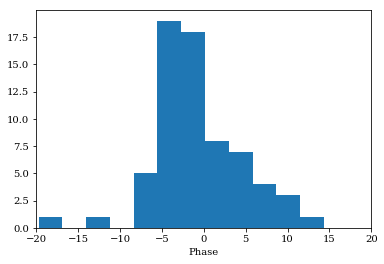

In [247]:
# print phases[(phases > -10) & (phases < 0)]
# print len(phases[(phases > -10) & (phases < 0)])
plt.hist(phases, bins=50)
plt.xlim(-20,20)
plt.xlabel('Phase')
plt.show()

In [156]:
# composites_test, sn_arrays_test, og_sn_arrays_test, boot_sn_arrays_test = kpora.make_composite(test_queries, 
#                             make_corr=False, av_corr=False,
#                             shape_param='x1', boot=True, medmean=1, verbose=True, gini_balance=True, 
#                             combine=True, get_og_arr=True, db_file='../data/kaepora_v1.1.db')
vel_queries = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'kyleplot' and Events.kyle_vel >= -11.8 and Events.Av_25 > 0 and phase between -5 and 5",
               "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'kyleplot' and Events.kyle_vel between -30 and -11.8 and Events.Av_25 > 0 and phase between -5 and 5"]
# vel_queries = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'kyleplot' and Events.kyle_vel >= -11.8 and Events.Av_25 > 0 and phase between -10 and 0",
#                "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'kyleplot' and Events.kyle_vel between -30 and -11.8 and Events.Av_25 > 0 and phase between -10 and 0"]
composites_vel, sn_arrays_vel, boot_sn_arrays_vel = kpora.make_composite(vel_queries, boot=True, medmean=1, verbose=True, av_corr=True, shape_param='kyle_x1',
                                                                         gini_balance=True, combine=True, get_og_arr=False, make_corr=True,
                                                                         db_file='../data/kaepora_v1.1_wkyledata.db')
# composites_vel, sn_arrays_vel, boot_sn_arrays_vel = kpora.make_composite(vel_queries, boot=False, medmean=1, verbose=True, av_corr=True,
#                                                                          gini_balance=False, combine=True, get_og_arr=False, make_corr=False,
#                                                                          db_file='../data/kaepora_v1.1_wkyledata.db')


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'kyleplot' and Events.kyle_vel >= -11.8 and Events.Av_25 > 0 and phase between -10 and 0
73 Total Spectra found
2 flagged spectra removed 71 spectra left
0 spectra of peculiar Ias removed 71 spectra left
71 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
71 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
ps16bby kyle_foundation_ps16bby_phase=-5.66398934891.txt kyleplot 95.2876576844 -5.66398934891 -0.910682039389 3232.0 8730.0
2017ckx kyle_foundation_2017ckx_phase=-5.02466525823.txt kyleplot 28.7220351229 -5.02466525823 2.05825578172 3436.0 7170.0
2017cpu kyle_foundation_2017cpu_phase=-1.61488826747.txt kyleplot 16.9014418552 -1.61488826747 0.753421792792 3356.0 6988.0
asassn15il kyle_foundation_asassn15il_phase=-2.27076872997.txt kyleplot 135.976516238 -2.27076872997 1.31998013166 3228

Gini balancing...
Balanced after 22 iterations
Bootstrapping


KeyboardInterrupt: 

-0.4634935322840539
-0.6176011415602211


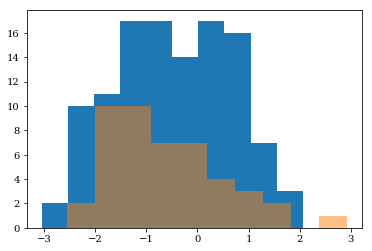

In [47]:
x1_low = []
x1_high = []
for sn in sn_arrays_vel[0]:
    x1_low.append(sn.event_data['kyle_x1'])
for sn in sn_arrays_vel[1]:
    x1_high.append(sn.event_data['kyle_x1'])
# print x1_low
# print x1_high
plt.hist(x1_low)
plt.hist(x1_high, alpha=.5)
print np.average(x1_low)
print np.average(x1_high)
plt.show()

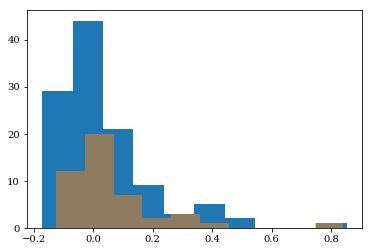

In [48]:
x1_low = []
x1_high = []
for sn in sn_arrays_vel[0]:
    x1_low.append(sn.event_data['kyle_c'])
for sn in sn_arrays_vel[1]:
    x1_high.append(sn.event_data['kyle_c'])
plt.hist(x1_low)
plt.hist(x1_high, alpha=.5)
plt.show()

nan
Phase:  -0.6260322559215169
dm15:  -0.5153282497071074
Redshift:  nan
HR:  0.9643567072294271
nan
Phase:  -0.648068850460398
dm15:  -0.787216008811253
Redshift:  nan
HR:  0.7015220751720218


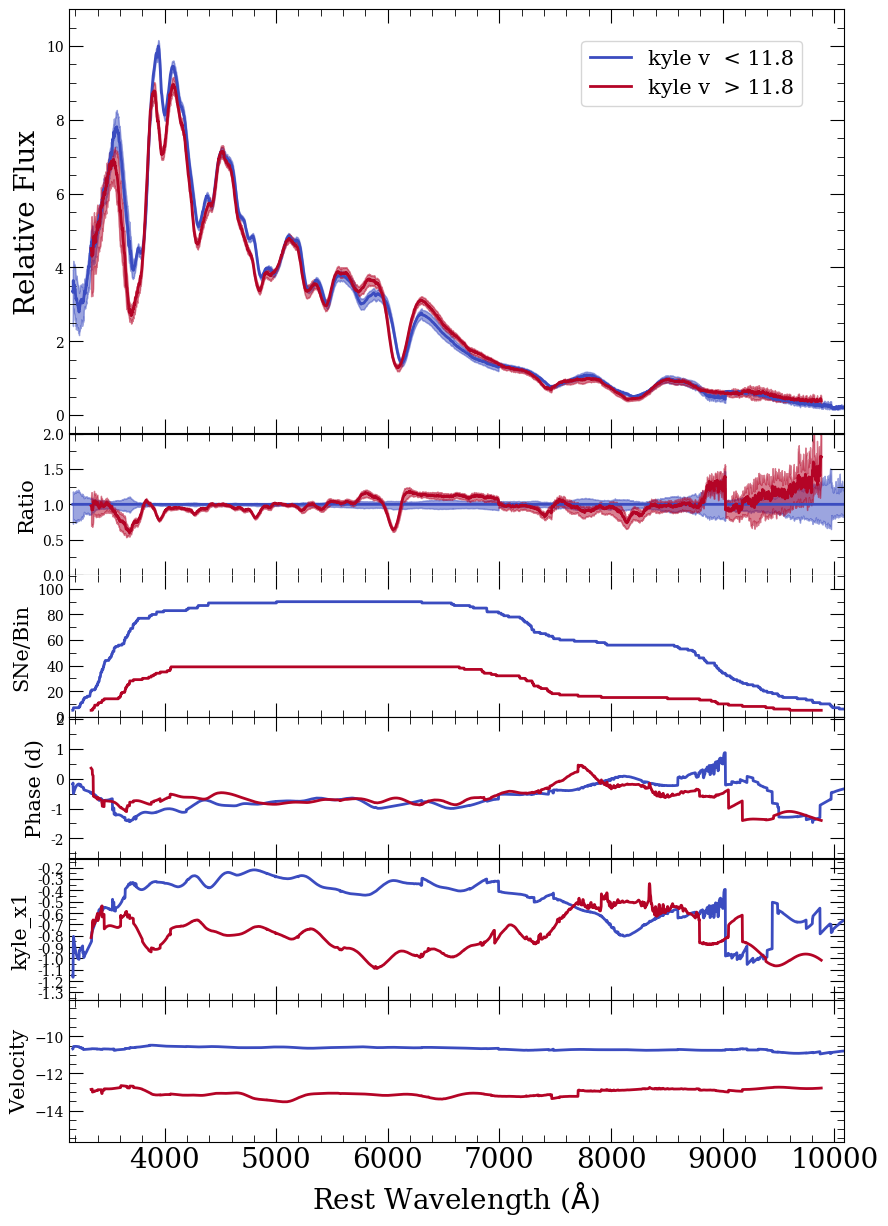

In [55]:
kpora.set_min_num_spec(composites_vel, 5)
kplot.comparison_plot(composites_vel, scale_type=False, min_num_show=5, extra=True, legend_labels = ['kyle v  < 11.8', 'kyle v  > 11.8'], savename = '../../Foundation/Spectra/kyle_plot_spectra/kyle_vsplit_all_data')


In [31]:
kpora.save_comps_to_files(composites_vel, 'Kyle_Foundation', folder = '../../Foundation/Spectra/kyle_plot_spectra/')

-0.5 -0.47 nan
../../Foundation/Spectra/kyle_plot_spectra/Kyle_Foundation_N=57_Nspec=58_phase=m0.5_x1=-0.47.txt
-0.81 -0.87 nan
../../Foundation/Spectra/kyle_plot_spectra/Kyle_Foundation_N=30_Nspec=30_phase=m0.81_x1=-0.87.txt


In [53]:
velx1_queries = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'kyleplot' and Events.kyle_vel >= -11.8 and Events.Av_25 > 0 and phase between -5 and 5 and kyle_x1 between -1.5 and 0.3",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'kyleplot' and Events.kyle_vel between -30 and -11.8 and Events.Av_25 > 0 and phase between -5 and 5 and kyle_x1 between -1.5 and 0.5"]
composites_velx1, sn_arrays_velx1, boot_sn_arrays_velx1 = kpora.make_composite(velx1_queries, boot=True, medmean=1, verbose=True, av_corr=True, shape_param='kyle_x1',
                                                                         gini_balance=True, combine=True, get_og_arr=False, make_corr=True,
                                                                         db_file='../data/kaepora_v1.1_wkyledata.db')

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'kyleplot' and Events.kyle_vel >= -11.8 and Events.Av_25 > 0 and phase between -5 and 5 and kyle_x1 between -1.5 and 0.3
42 Total Spectra found
1 flagged spectra removed 41 spectra left
0 spectra of peculiar Ias removed 41 spectra left
41 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
41 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
asassn15pr kyle_asassn15pr_phase=1.02189720097.txt kyleplot 38.0124910813 1.02189720097 -0.68308275064 4352.0 9270.0
ps15ahs kyle_ps15ahs_phase=4.16222428833.txt kyleplot 32.2695362659 4.16222428833 0.198597303764 4246.0 6838.0
ps15bzz kyle_ps15bzz_phase=-3.19244304518.txt kyleplot 16.4095261513 -3.19244304518 -0.99687530486 3384.0 7492.0
ps17bii kyle_ps17bii_phase=-3.51996015793.txt kyleplot 77.663232299 -3.51996015793 -0.933909407808 3128.0 8566.0
2016h

Gini balancing...
Balanced after 11 iterations
Bootstrapping
scaling boots...
computing confidence intervals...


nan
Phase:  -0.915572955996669
dm15:  -0.561781688851041
Redshift:  nan
HR:  0.37831345990985565
nan
Phase:  -0.7647518339708019
dm15:  -0.610267534411454
Redshift:  nan
HR:  0.15491882839064508


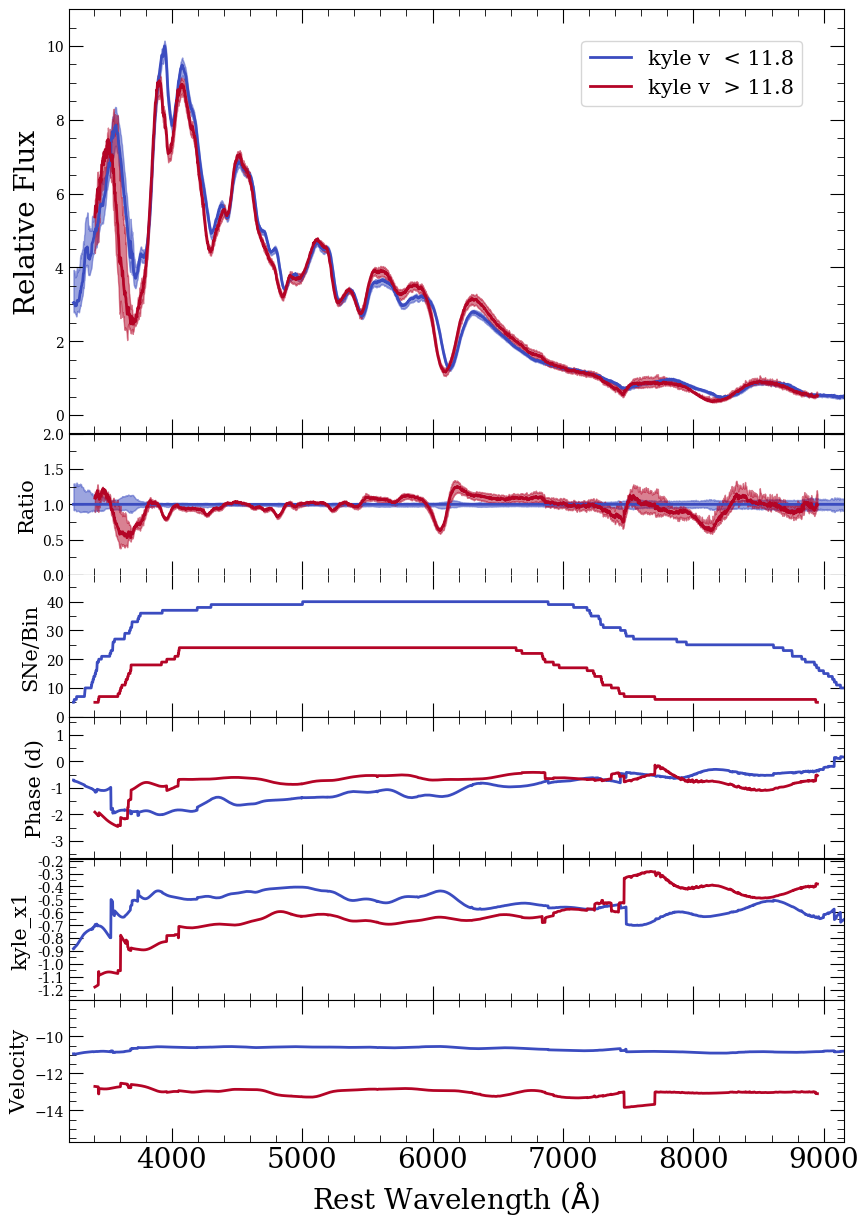

In [56]:
kpora.set_min_num_spec(composites_velx1, 5)
kplot.comparison_plot(composites_velx1, scale_type=False, min_num_show=5, extra=True, legend_labels = ['kyle v  < 11.8', 'kyle v  > 11.8'], savename='../../Foundation/Spectra/kyle_plot_spectra/kyle_vsplit_x1_control')


In [32]:
kpora.save_comps_to_files(composites_velx1, 'Kyle_Foundation_x1_controlled', folder = '../../Foundation/Spectra/kyle_plot_spectra/')

-0.49 -0.67 nan
../../Foundation/Spectra/kyle_plot_spectra/Kyle_Foundation_x1_controlled_N=26_Nspec=26_phase=m0.49_x1=-0.67.txt
-0.72 -0.58 nan
../../Foundation/Spectra/kyle_plot_spectra/Kyle_Foundation_x1_controlled_N=20_Nspec=20_phase=m0.72_x1=-0.58.txt


In [57]:
test_queries = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'kyleplot' and Events.kyle_vel >= -10.5 and Events.Av_25 > 0 and phase between -5 and 5",
                "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'kyleplot' and Events.kyle_vel between -30 and -12.5 and Events.Av_25 > 0 and phase between -5 and 5"]
composites_test, sn_arrays_test, boot_sn_arrays_test = kpora.make_composite(test_queries, boot=True, medmean=1, verbose=True, av_corr=True, shape_param='kyle_x1',
                                                                         gini_balance=True, combine=True, get_og_arr=False, make_corr=True,
                                                                         db_file='../data/kaepora_v1.1_wkyledata.db')

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'kyleplot' and Events.kyle_vel >= -10.5 and Events.Av_25 > 0 and phase between -5 and 5
34 Total Spectra found
1 flagged spectra removed 33 spectra left
0 spectra of peculiar Ias removed 33 spectra left
33 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
32 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
ps16fbb_combined None kyleplot 215.83009716186453 -2.422047661463792 0.7007231650403458 3184.0 8788.0
asassn16la kyle_asassn16la_phase=-2.739901715.txt kyleplot 179.621150627 -2.739901715 0.887363905865 3698.0 6944.0
ps15ahs kyle_ps15ahs_phase=4.16222428833.txt kyleplot 32.2695362659 4.16222428833 0.198597303764 4246.0 6838.0
ps15aii kyle_ps15aii_phase=0.0791535553055.txt kyleplot 89.4195469953 0.0791535553055 0.450758884122 3398.0 6686.0
2016gsu kyle_2016gsu_phase=-2.009279776.txt kylep

nan
Phase:  -1.0704974772847622
dm15:  -0.5870773629304112
Redshift:  nan
HR:  1.0267714876584586
nan
Phase:  0.0031913704071802043
dm15:  -0.674287797949639
Redshift:  nan
HR:  1.0556930738930028


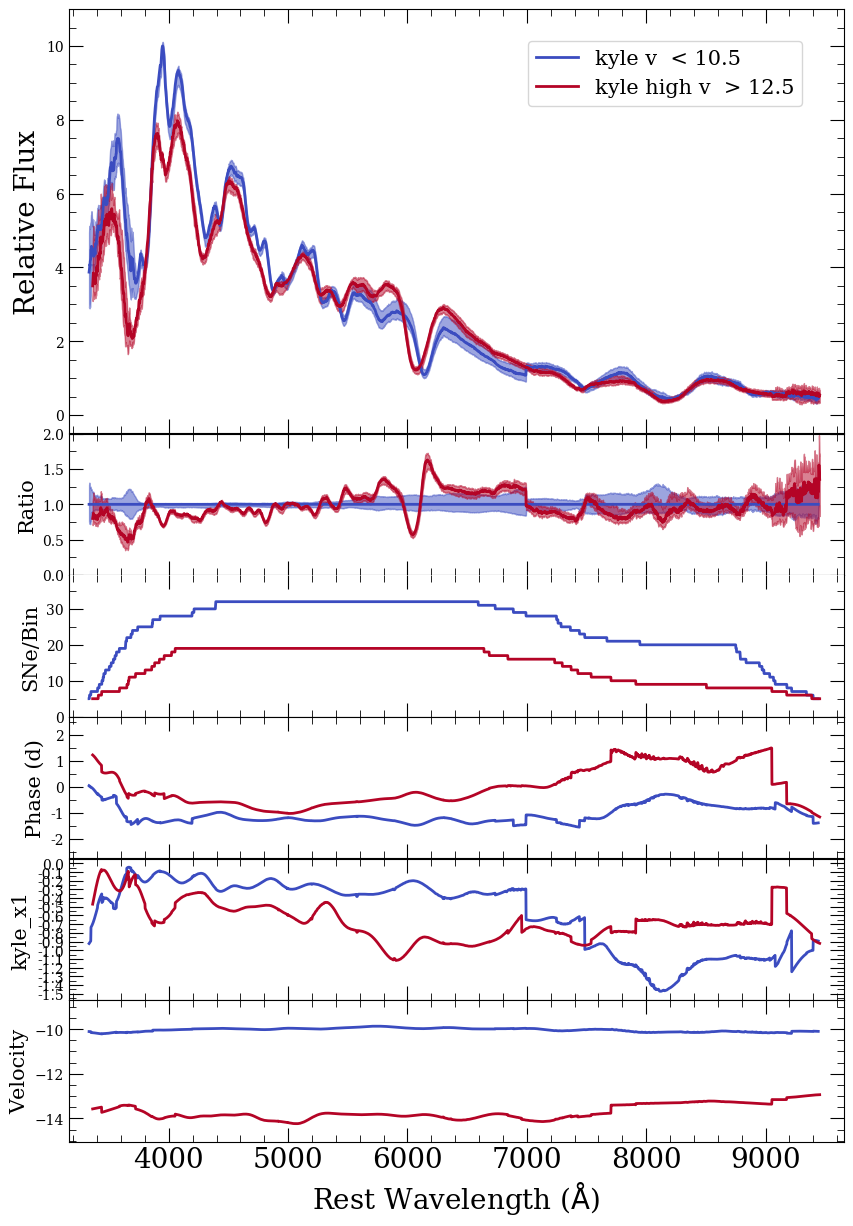

In [58]:
kpora.set_min_num_spec(composites_test, 5)
kplot.comparison_plot(composites_test, scale_type=False, min_num_show=5, extra=True, legend_labels = ['kyle v  < 10.5', 'kyle high v  > 12.5'], savename='../../Foundation/Spectra/kyle_plot_spectra/kyle_large_vsplit')

In [33]:
kpora.save_comps_to_files(composites_test, 'Kyle_Foundation_large_vdiff', folder = '../../Foundation/Spectra/kyle_plot_spectra/')

-1.34 -0.45 nan
../../Foundation/Spectra/kyle_plot_spectra/Kyle_Foundation_large_vdiff_N=16_Nspec=17_phase=m1.34_x1=-0.45.txt
-0.82 -0.57 nan
../../Foundation/Spectra/kyle_plot_spectra/Kyle_Foundation_large_vdiff_N=14_Nspec=14_phase=m0.82_x1=-0.57.txt


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'kyleplot' and Events.kyle_vel >= -11.8 and Events.Av_25 > 0 and phase between -3 and 5 and filename like '%foundation%' and filename != 'kyle_foundation_asassn16la_phase=-2.739901715.txt' and filename != 'kyle_foundation_2017cpu_phase=-1.61488826747.txt' and filename != 'kyle_foundation_2017ckx_phase=-5.02466525823.txt' and filename != 'kyle_foundation_asassn15np_phase=-1.63200650294.txt' and filename != 'kyle_foundation_asassn16jf_phase=-6.05004316433.txt' and filename != 'kyle_foundation_asassn15nr_phase=4.77672098892.txt' and filename != 'kyle_foundation_2016gsu_phase=-2.009279776.txt' and Events.SN != 'ps16fbb'
20 Total Spectra found
0 flagged spectra removed 20 spectra left
0 spectra of peculiar Ias removed 20 spectra left
20 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
20 total SNe
removed spectra of SNe with A_V > 2.0
SN Fil

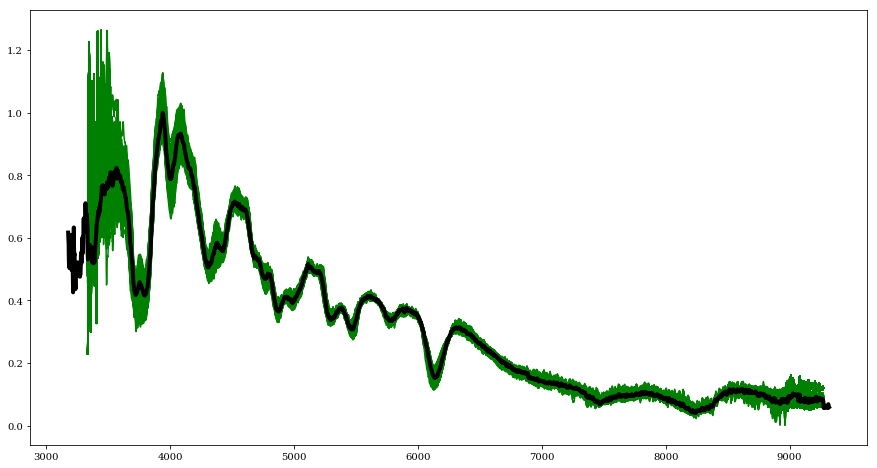

computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'kyleplot' and Events.kyle_vel between -30 and -11.8 and Events.Av_25 > 0 and phase between -5 and 5 and filename like '%foundation%' and filename != 'kyle_foundation_2016cvv_phase=1.55477190182.txt'
9 Total Spectra found
0 flagged spectra removed 9 spectra left
0 spectra of peculiar Ias removed 9 spectra left
9 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
8 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
asassn15go_combined None kyleplot 88.75083285524302 0.14100666726214758 2.918735650159019 3144.0 9388.0
2017oz kyle_foundation_2017oz_phase=-3.82531764956.txt kyleplot 34.530116655 -3.82531764956 -0.0853854575627 4012.0 6636.0
2017po kyle_foundation_2017po_phase=-0.345116699194.txt kyleplot 47.0878513738 -0.345116699194 0.233682236906 4104.0 6792.0


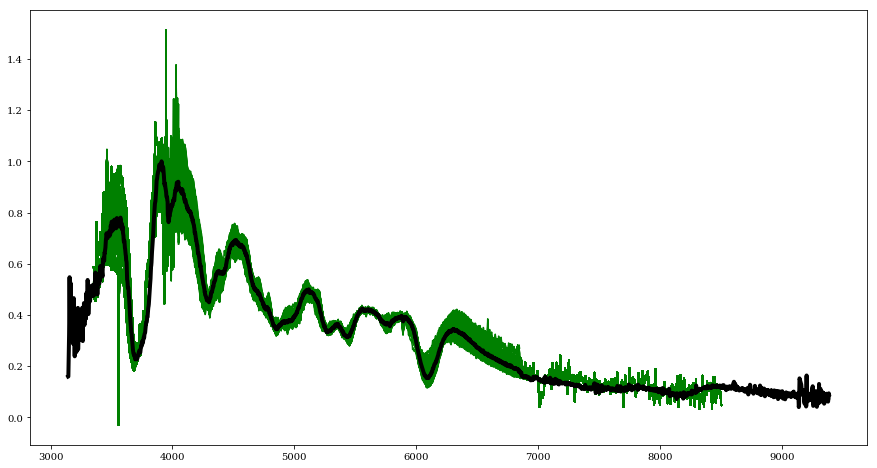

computing confidence intervals...


In [32]:
# vel_queries_found = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'kyleplot' and Events.kyle_vel >= -11.8 and Events.Av_25 > 0 and phase between -4 and 6 and filename like '%foundation%' and filename != 'kyle_foundation_asassn16la_phase=-2.739901715.txt' and kyle_x1 between -.5 and 1. and filename != 'kyle_foundation_2017cpu_phase=-1.61488826747.txt'",
#                "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'kyleplot' and Events.kyle_vel between -30 and -11.8 and Events.Av_25 > 0 and phase between -5 and 5 and filename like '%foundation%'"]
vel_queries_found = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'kyleplot' and Events.kyle_vel >= -11.8 and Events.Av_25 > 0 and phase between -3 and 5 and filename like '%foundation%' and filename != 'kyle_foundation_asassn16la_phase=-2.739901715.txt' and filename != 'kyle_foundation_2017cpu_phase=-1.61488826747.txt' and filename != 'kyle_foundation_2017ckx_phase=-5.02466525823.txt' and filename != 'kyle_foundation_asassn15np_phase=-1.63200650294.txt' and filename != 'kyle_foundation_asassn16jf_phase=-6.05004316433.txt' and filename != 'kyle_foundation_asassn15nr_phase=4.77672098892.txt' and filename != 'kyle_foundation_2016gsu_phase=-2.009279776.txt' and Events.SN != 'ps16fbb'",
                     "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'kyleplot' and Events.kyle_vel between -30 and -11.8 and Events.Av_25 > 0 and phase between -5 and 5 and filename like '%foundation%' and filename != 'kyle_foundation_2016cvv_phase=1.55477190182.txt'"]
composites_found, sn_arrays_found, og_sn_arrays_found, boot_sn_arrays_found = kpora.make_composite(vel_queries_found, boot=True, nboots=1000, medmean=1, verbose=True, av_corr=True, shape_param='kyle_x1',
                                                                         gini_balance=True, combine=True, get_og_arr=True, make_corr=True, scale_region=[5500,5700],
                                                                         db_file='../data/kaepora_v1.1_wkyledata.db')

None


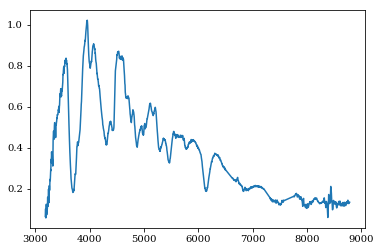

kyle_foundation_asassn15il_phase=-2.27076872997.txt


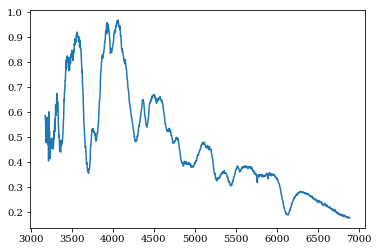

kyle_foundation_asassn15nr_phase=4.77672098892.txt


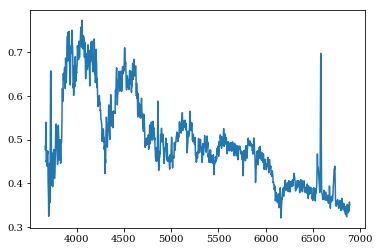

kyle_foundation_asassn15pn_phase=3.4191859734.txt


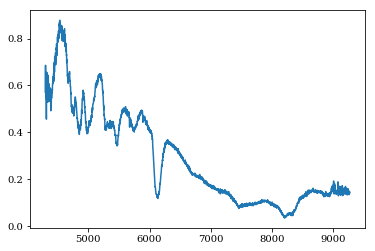

kyle_foundation_asassn15pr_phase=1.02189720097.txt


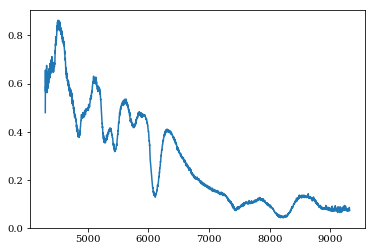

kyle_foundation_ps15ahs_phase=4.16222428833.txt


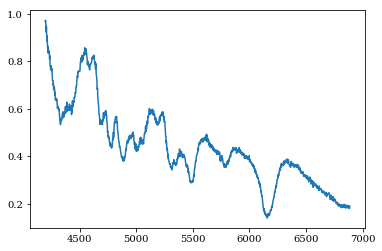

kyle_foundation_ps15aii_phase=0.0791535553055.txt


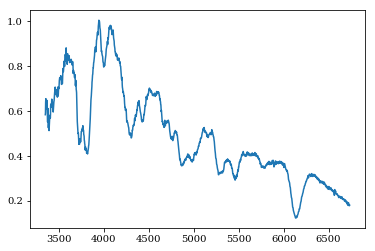

kyle_foundation_ps15bwh_phase=-0.0180355475521.txt


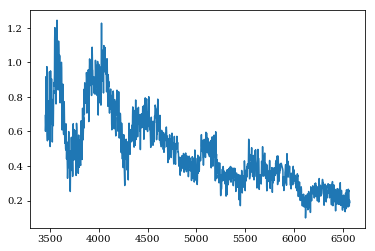

kyle_foundation_ps15bzz_phase=-3.19244304518.txt


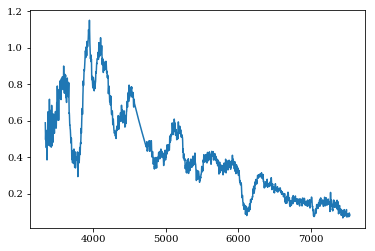

kyle_foundation_ps16cqa_phase=1.60302915219.txt


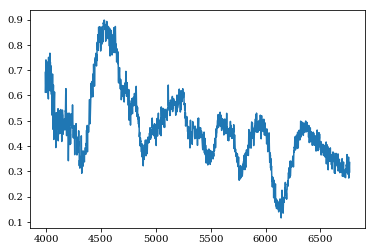

kyle_foundation_ps17bii_phase=-3.51996015793.txt


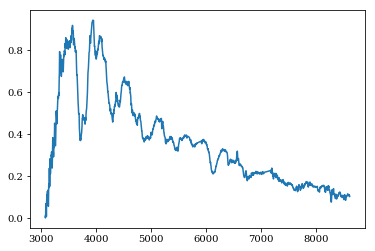

kyle_foundation_2016gmg_phase=-2.06099989421.txt


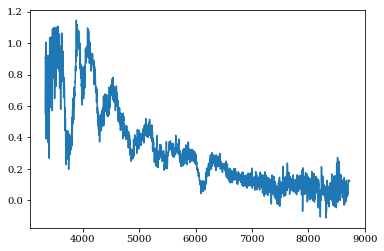

kyle_foundation_2016gsu_phase=-2.009279776.txt


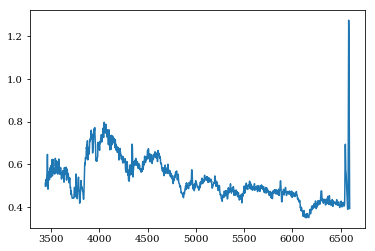

kyle_foundation_2016hhv_phase=2.99542840765.txt


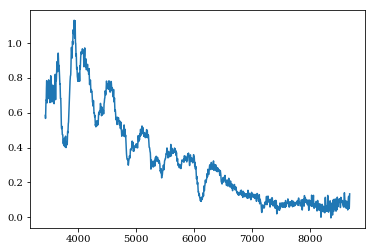

kyle_foundation_2017cfc_phase=0.459371638989.txt


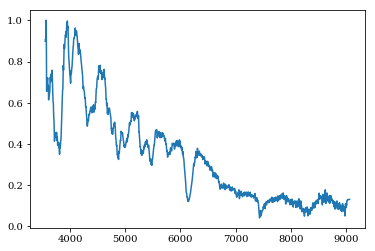

kyle_foundation_2017cii_phase=0.509012817511.txt


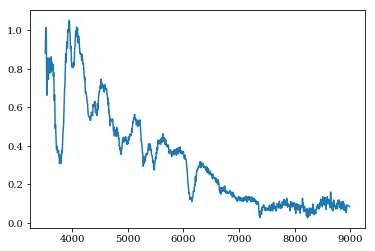

kyle_foundation_2017ciy_phase=-0.550489121496.txt


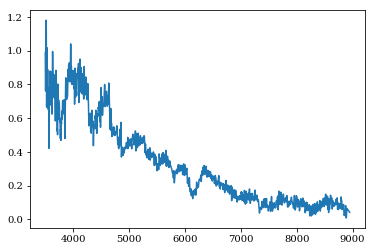

kyle_foundation_2017cjv_phase=-1.86137658412.txt


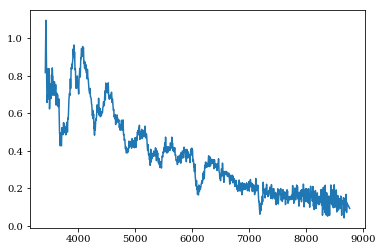

kyle_foundation_2017hn_phase=-4.19127714715.txt


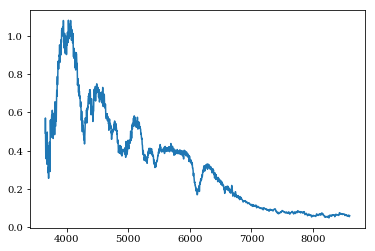

kyle_foundation_2017mf_phase=-3.93157106709.txt


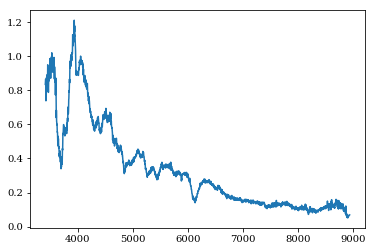

kyle_foundation_2017zd_phase=-3.99843230577.txt


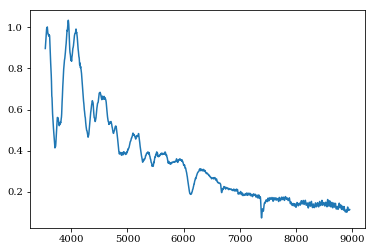

kyle_foundation_asassn15tg_phase=-3.94340870013.txt


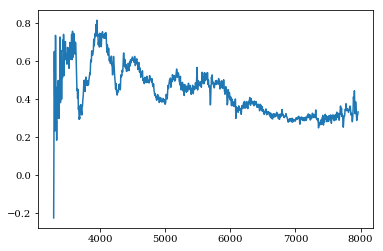

kyle_foundation_asassn16ct_phase=-2.80293140419.txt


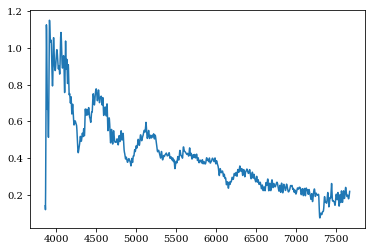

kyle_foundation_asassn16dw_phase=-0.479844779937.txt


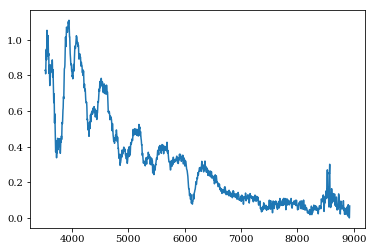

kyle_foundation_asassn17aj_phase=-3.05015421659.txt


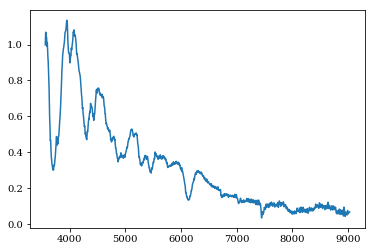

kyle_foundation_asassn17at_phase=-3.92760832563.txt


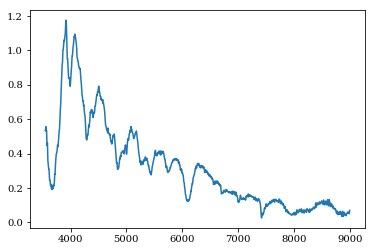

kyle_foundation_asassn17eb_phase=0.0742016556139.txt


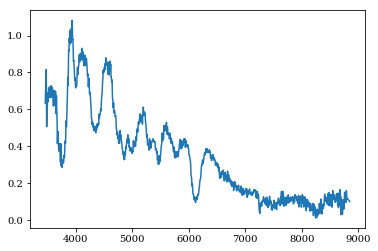

kyle_foundation_atlas17ajn_phase=1.93178900097.txt


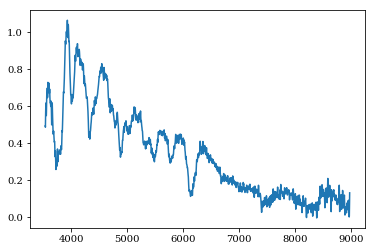

kyle_foundation_ps16dnp_phase=3.03058498496.txt


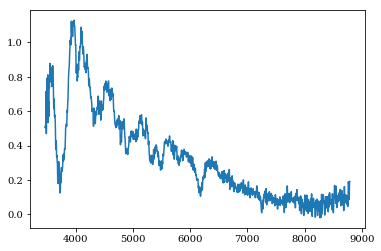

kyle_foundation_ps16evk_phase=1.21389134103.txt


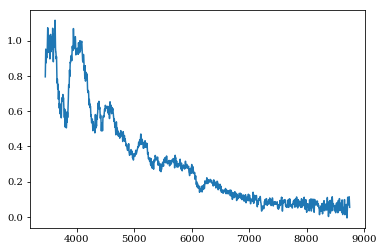

kyle_foundation_ps16fa_phase=-2.24784143568.txt


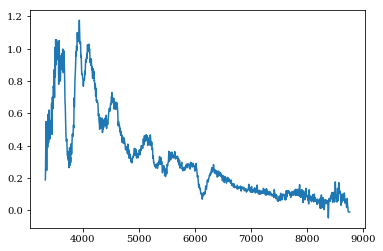

In [249]:
# 'kyle_foundation_2017ckx_phase=-5.02466525823.txt'
# 'kyle_foundation_asassn15np_phase=-1.63200650294.txt'
# 'kyle_foundation_asassn16jf_phase=-6.05004316433.txt'
for sn in sn_arrays_found[0]:
    print sn.filename
    plt.plot(sn.wavelength, sn.flux)
    plt.show()

None -13.07863594


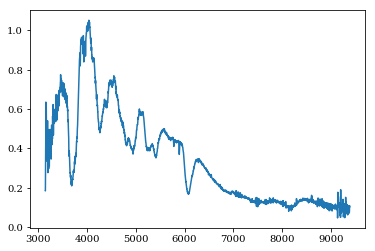

kyle_foundation_2017oz_phase=-3.82531764956.txt -13.7153495631


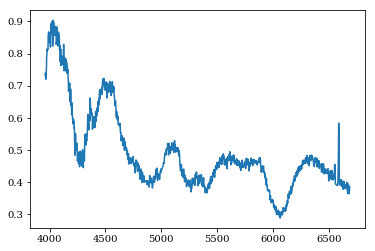

kyle_foundation_2017po_phase=-0.345116699194.txt -12.7189590861


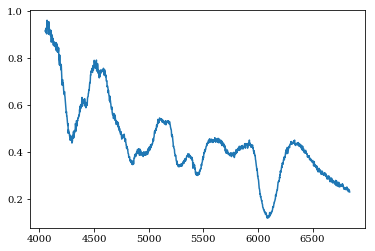

kyle_foundation_asassn15od_phase=-1.58367556708.txt -11.9266408215


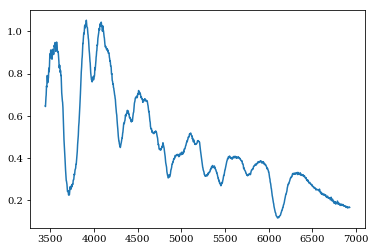

kyle_foundation_asassn15uw_phase=-1.94283563048.txt -12.3306965554


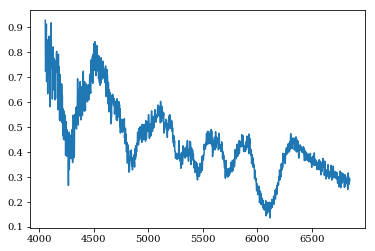

kyle_foundation_asassn16fs_phase=4.38281493353.txt -12.2284418416


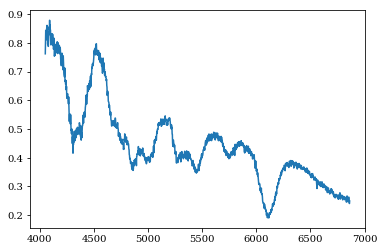

kyle_foundation_ps16bnz_phase=-3.2910765016.txt -12.8178117329


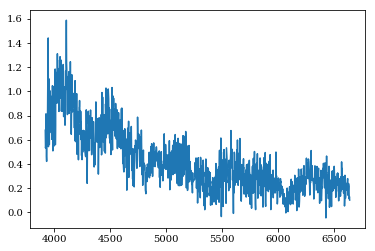

kyle_foundation_2016cvv_phase=1.55477190182.txt -12.26477


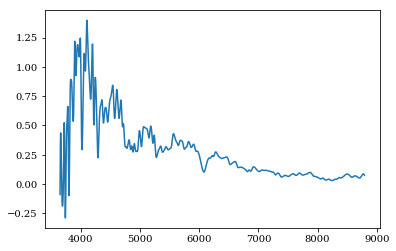

kyle_foundation_2016glp_phase=-3.45854332022.txt -16.7718420223


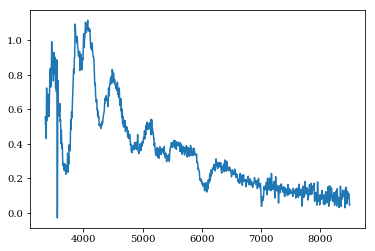

In [250]:
for sn in sn_arrays_found[1]:
    print sn.filename, sn.event_data['kyle_vel']
    plt.plot(sn.wavelength, sn.flux)
    plt.show()

asassn15il


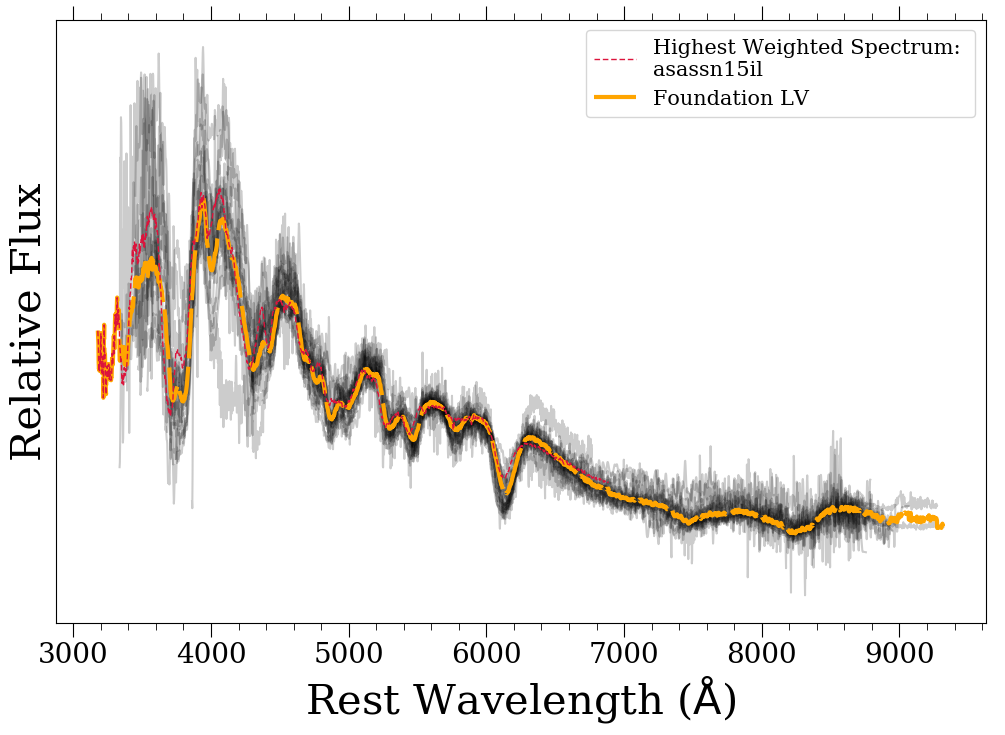

In [33]:
kplot.plot_comp_and_all_spectra(composites_found[0], sn_arrays_found[0],dm15=True, show_ivar=False, one_color=True, scale_region=[5500,5700], comp_name='Foundation LV', savename='../../Foundation/Spectra/kyle_plot_spectra/foundation_lowv_all_spec_nooutliers')


asassn15go_combined


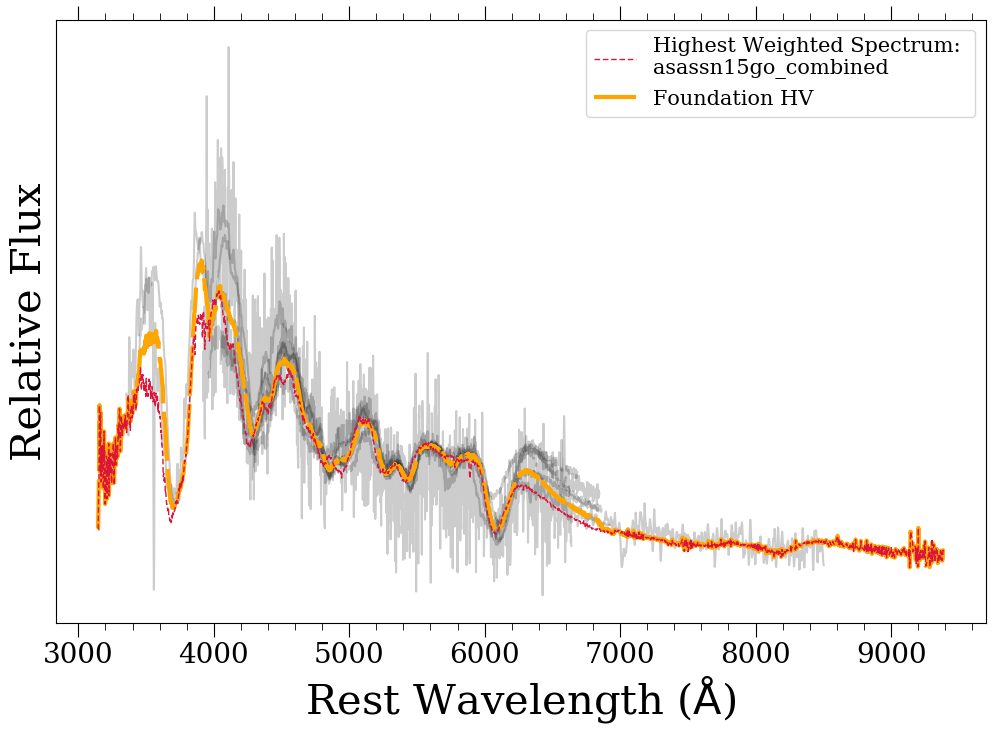

In [34]:
kplot.plot_comp_and_all_spectra(composites_found[1], sn_arrays_found[1],dm15=True, show_ivar=False, one_color=True, scale_region=[5500,5700], comp_name='Foundation HV', savename='../../Foundation/Spectra/kyle_plot_spectra/foundation_highv_all_spec')

0.036165922705802135
Phase:  0.6461436092404147
dm15:  -0.03924010908036449
Redshift:  0.036165922705802135
HR:  0.007003476916091381
0.026558907725597762
Phase:  -0.5326458868052203
dm15:  0.5941905137345508
Redshift:  0.026558907725597762
HR:  0.6093448805963653


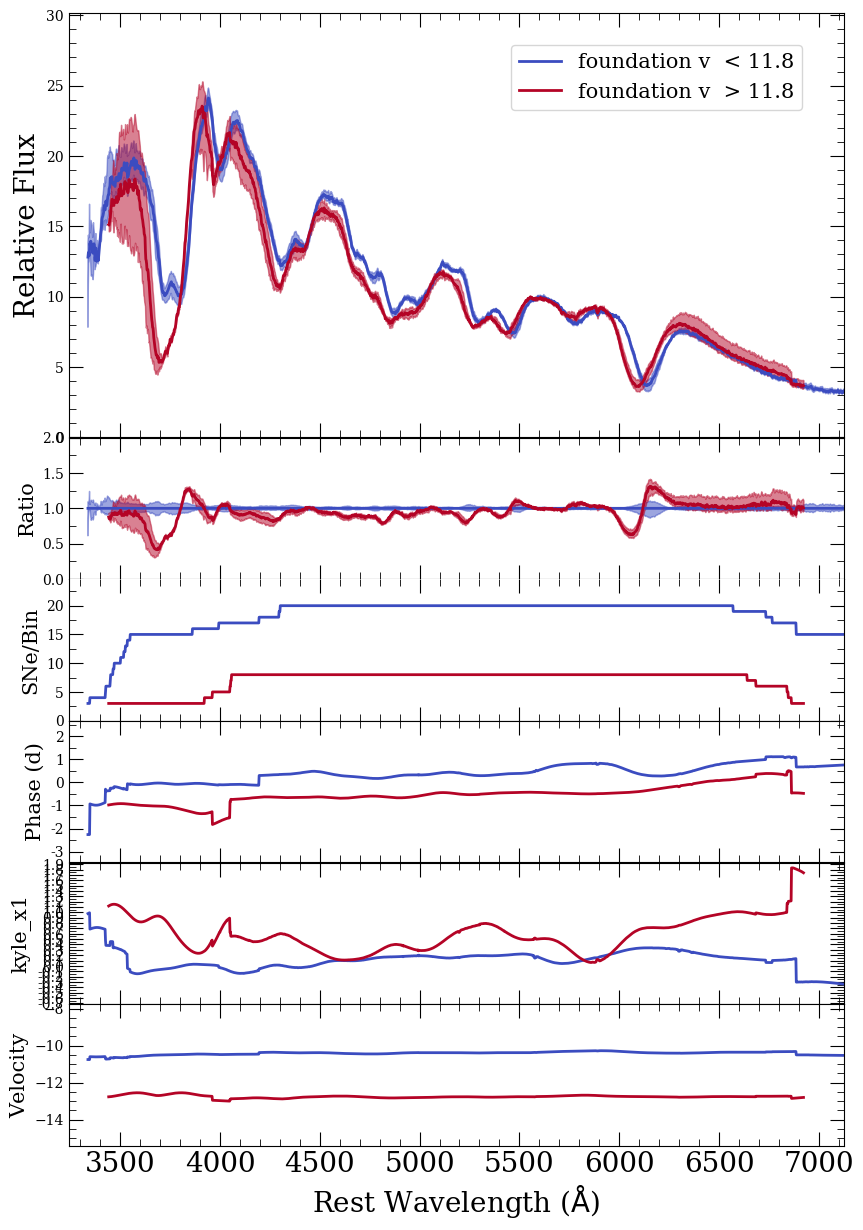

In [35]:
kpora.set_min_num_spec(composites_found, 3)
kplot.comparison_plot(composites_found, scale_type=False, min_num_show=3, extra=True, legend_labels = ['foundation v  < 11.8', 'foundation v  > 11.8'], scale_region = [5500, 5700], savename='../../Foundation/Spectra/kyle_plot_spectra/foundation_only_vsplit')


In [ ]:
kpora.save_comps_to_files([composites_found[0]], 'foundation_only_vlow_nooutliers', scale_region=[5500,5700], folder = '../../Foundation/Spectra/kyle_plot_spectra/')

In [327]:
# kpora.save_comps_to_files([composites_found[0]], 'foundation_only_vlow', scale_region=[5500,5700], folder = '../../Foundation/Spectra/kyle_plot_spectra/')
kpora.save_comps_to_files([composites_found[1]], 'foundation_only_vhigh_v2', scale_region=[5500,5700], folder = '../../Foundation/Spectra/kyle_plot_spectra/')


-0.54 0.37 nan
../../Foundation/Spectra/kyle_plot_spectra/foundation_only_vhigh_v2_N=8_Nspec=9_phase=m0.54_x1=0.37.txt


-0.04273866994675586
0.6325747582279173


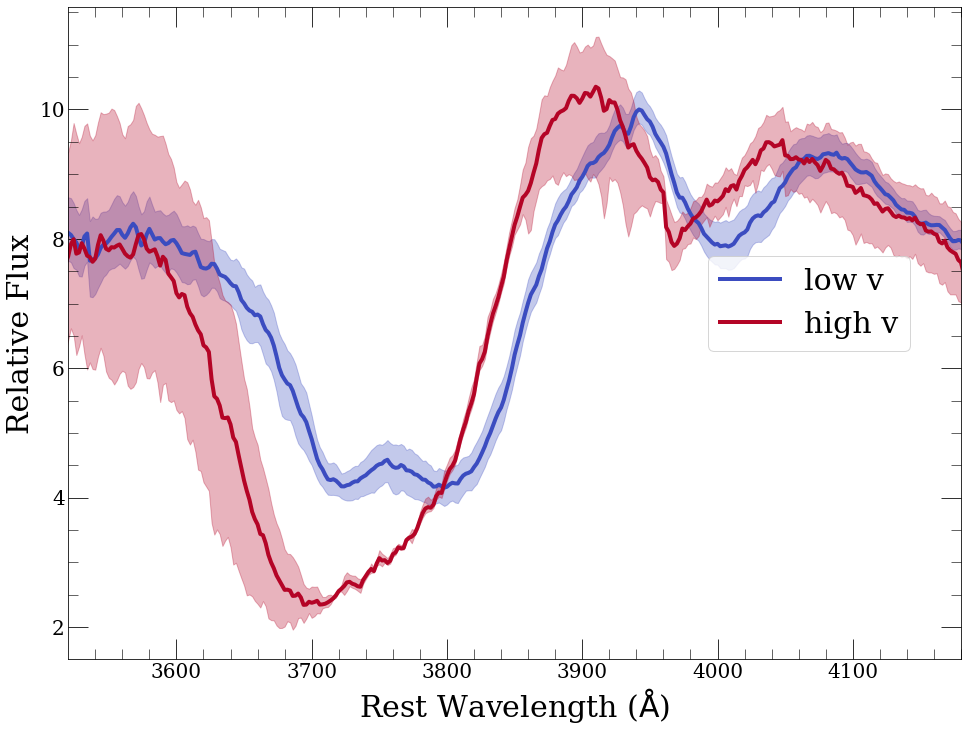

In [36]:
kplot.feature_plot(composites_found, scale_region=[3500,4200], boot=True, labels=['low v', 'high v'], cmap_kind='diff')

In [261]:
# vel_queries_found_big_vsplit = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'kyleplot' and Events.kyle_vel >= -10.5 and Events.Av_25 > 0 and phase between -6 and 2 and filename like '%foundation%' and filename != 'kyle_foundation_asassn16la_phase=-2.739901715.txt' and kyle_x1 between -.5 and 1. and filename != 'kyle_foundation_2017cpu_phase=-1.61488826747.txt'",
#                      "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source = 'kyleplot' and Events.kyle_vel between -30 and -12.5 and Events.Av_25 > 0 and phase between -5 and 5 and filename like '%foundation%'"]
# composites_found_big_vsplit, sn_arrays_found_big_vsplit, boot_sn_arrays_found_big_vsplit = kpora.make_composite(vel_queries_found_big_vsplit, boot=True, medmean=1, verbose=True, av_corr=True, shape_param='kyle_x1',
#                                                                          gini_balance=True, combine=True, get_og_arr=False, make_corr=True,
#                                                                          db_file='../data/kaepora_v1.1_wkyledata.db')

In [262]:
# kpora.set_min_num_spec(composites_found_big_vsplit, 4)
# kplot.comparison_plot(composites_found_big_vsplit, scale_type=False, min_num_show=4, extra=True, legend_labels = ['foundation v  < 10.5', 'foundation v  > 12.5'], savename='../../Foundation/Spectra/kyle_plot_spectra/kyle_foundation_only_big_vsplit')


In [263]:
# for sn in sn_arrays_test[1]:
#     print sn.name, sn.event_data['kyle_vel']

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -2 and 2 and ((dm15_source > 1. and dm15_source < 1.3) or (dm15_from_fits > 1. and dm15_from_fits < 1.3)) and (si_v0 >= -11800 and si_v0 <= -8500)
113 Total Spectra found
5 flagged spectra removed 108 spectra left
0 spectra of peculiar Ias removed 108 spectra left
106 spectra of SNe that have host reddening corrections
Arrays cleaned
106 spectra may have telluric contamination
40 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
2003cq_combined None bsnip 29.241685516414822 -1.1776000418224 1.1999999999999997 3036.0 10064.0
2005ag_combined None bsnip 18.88840445527936 -0.6946931105471706 1.0465189775571149 3504.0 8566.0
2005cf_combined None uv 240.6756253598725 -0.7536181671241282 1.1 2090.0 10432.0
2002ck_combined None cfa 48.40766288075774 0.980508884127439 1.08 3616.0 7320.0
1996x_combined None other 425.5844728649996 0.0664766942579581 1.2

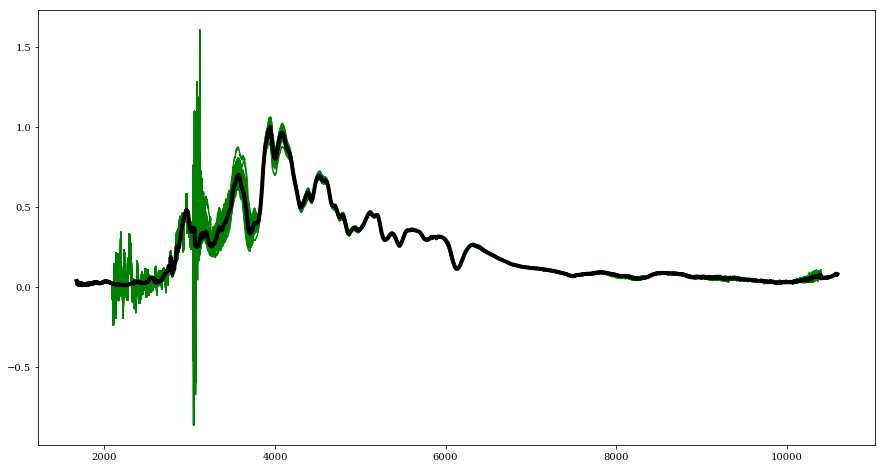

computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -2 and 2 and ((dm15_source > 1. and dm15_source < 1.3) or (dm15_from_fits > 1. and dm15_from_fits < 1.3)) and si_v0 < -11800
33 Total Spectra found
1 flagged spectra removed 32 spectra left
0 spectra of peculiar Ias removed 32 spectra left
32 spectra of SNe that have host reddening corrections
Arrays cleaned
32 spectra may have telluric contamination
18 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
2005na_combined None bsnip 51.743874196522505 0.41311084431255024 1.0899999999999999 3228.0 10230.0
1997bp_combined None cfa 161.80430322299443 0.2169346737954078 1.0800000000000005 3672.0 7500.0
2002bo_combined None bsnip 376.5834811600586 -0.6085512971756235 1.08 3190.0 10356.0
2003w_combined None cfa 74.78729726502904 0.08764943095145142 1.1400000000000001 3650.0 7392.0
2003ch_combined None cfa 41.78417134077

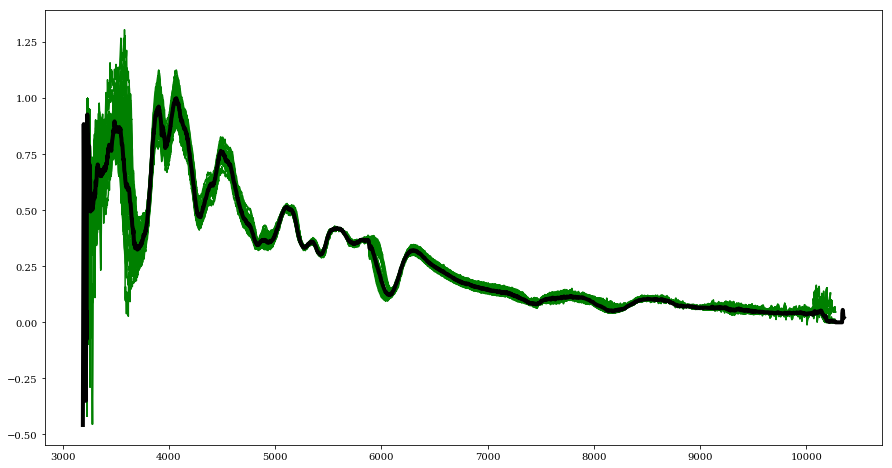

computing confidence intervals...


In [37]:
# kpora_queries = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -2 and 0 and ((dm15_source > 1. and dm15_source < 1.4) or (dm15_from_fits > 1. and dm15_from_fits < 1.4)) and (si_v0 >= -11800 and si_v0 <= -8500)",
#                  "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -2 and 0 and ((dm15_source > 1. and dm15_source < 1.4) or (dm15_from_fits > 1. and dm15_from_fits < 1.4)) and si_v0 < -11800"]
# kpora_queries = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -2 and 0 and x1 > -99 and (si_v0 >= -11800 and si_v0 <= -8500)",
#                  "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -2 and 0 and x1 > -99 and si_v0 < -11800"]
kpora_queries = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -2 and 2 and ((dm15_source > 1. and dm15_source < 1.3) or (dm15_from_fits > 1. and dm15_from_fits < 1.3)) and (si_v0 >= -11800 and si_v0 <= -8500)",
                 "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -2 and 2 and ((dm15_source > 1. and dm15_source < 1.3) or (dm15_from_fits > 1. and dm15_from_fits < 1.3)) and si_v0 < -11800"]

composites_kpora, sn_arrays_kpora, og_sn_arrays_kpora, boot_sn_arrays_kpora = kpora.make_composite(kpora_queries, boot=True, medmean=1, verbose=True, av_corr=True, shape_param='dm15',
                                                                         gini_balance=True, combine=True, get_og_arr=True, make_corr=True, scale_region=[5500,5700],
                                                                         db_file='../data/kaepora_v1.1.db')
# composites_kpora, sn_arrays_kpora, boot_sn_arrays_kpora = kpora.make_composite(kpora_queries, boot=False, medmean=1, verbose=True, av_corr=True, shape_param='x1',
#                                                                          gini_balance=True, combine=True, get_og_arr=False, make_corr=True,
#                                                                          db_file='../data/kaepora_v1.1.db')

2011fe_combined


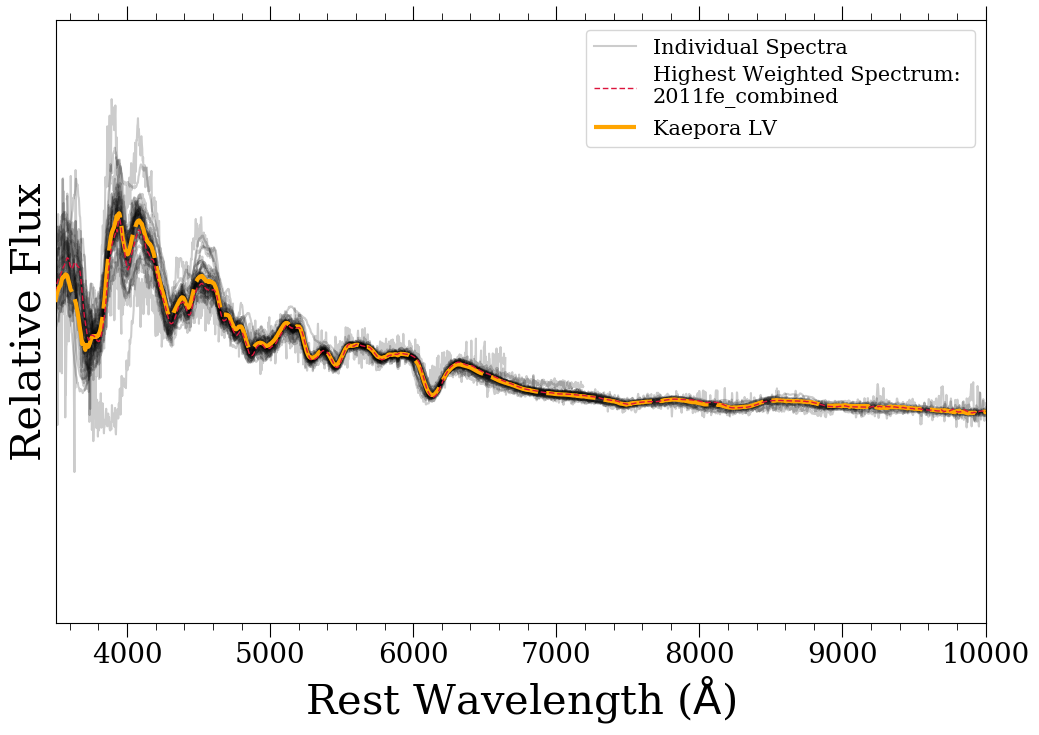

In [38]:
kplot.plot_comp_and_all_spectra(composites_kpora[0], sn_arrays_kpora[0],dm15=True, show_ivar=False, one_color=True, xlim = [3500,10000], scale_region=[5500,5700], comp_name='Kaepora LV', savename='../../Foundation/Spectra/kyle_plot_spectra/kaepora_lowv_all_spec')


2005na_combined


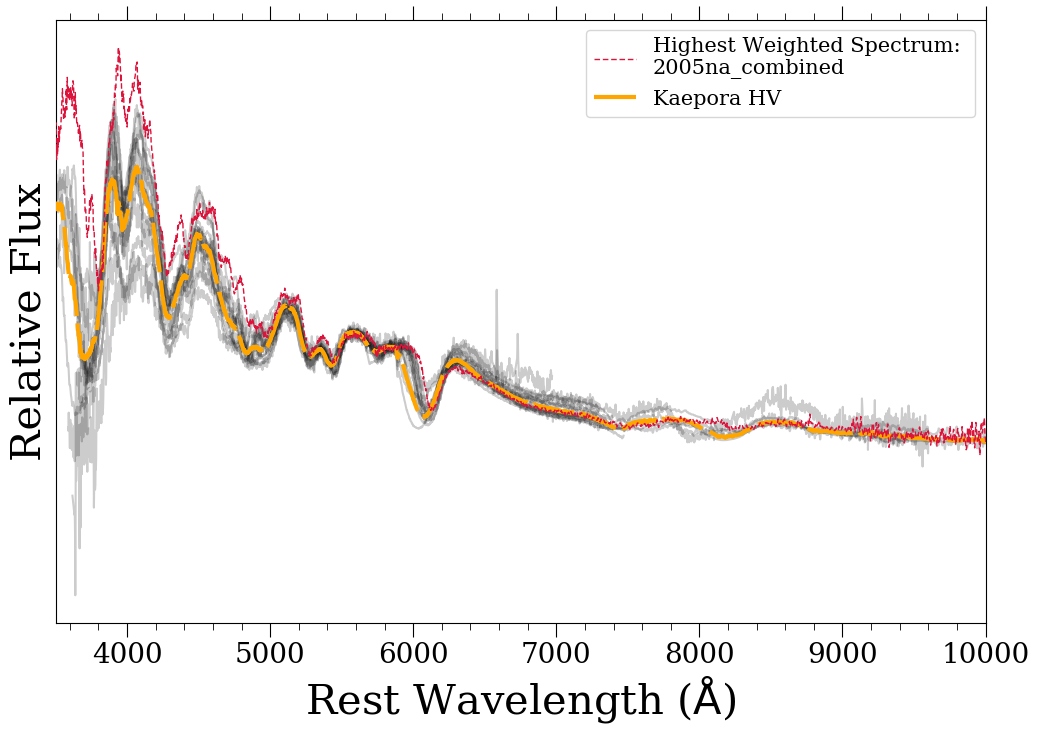

In [39]:
kplot.plot_comp_and_all_spectra(composites_kpora[1], sn_arrays_kpora[1],dm15=True, show_ivar=False, one_color=True, xlim = [3500,10000], scale_region=[5500,5700], comp_name='Kaepora HV', savename='../../Foundation/Spectra/kyle_plot_spectra/kaepora_highv_all_spec')


nan
Phase:  0.11112269278516591
dm15:  1.138523608185868
Redshift:  nan
HR:  1.5913150028894005
nan
Phase:  -0.2589395668240839
dm15:  1.126547103547809
Redshift:  nan
HR:  1.6833669661377317


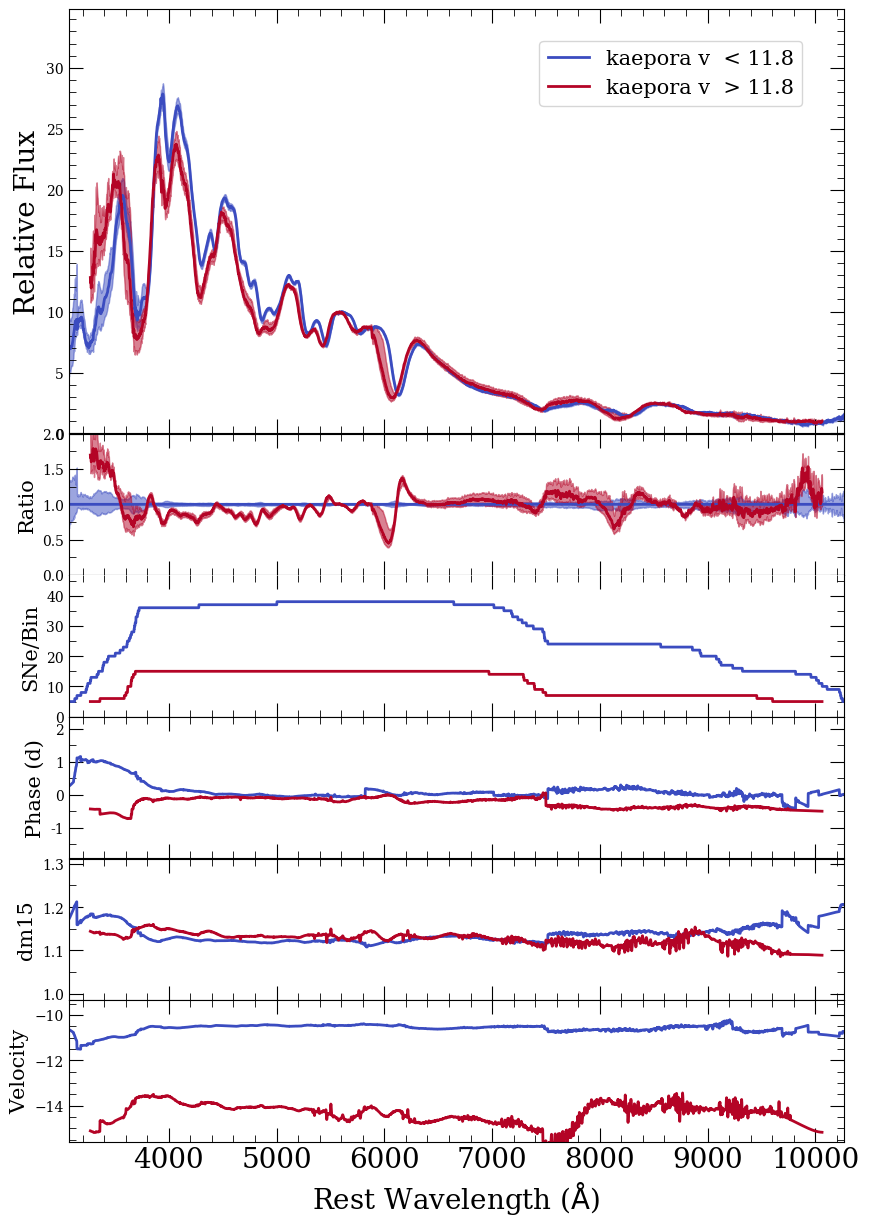

In [40]:
kpora.set_min_num_spec(composites_kpora, 5)
kplot.comparison_plot(composites_kpora, scale_type=False, min_num_show=5, extra=True, scale_region=[5500, 5700], legend_labels = ['kaepora v  < 11.8', 'kaepora v  > 11.8'], savename='../../Foundation/Spectra/kyle_plot_spectra/kaepora_only_vsplit')


In [294]:
kpora.save_comps_to_files([composites_kpora[0]], 'kaepora_only_vlow', scale_region=[5500,5700], folder = '../../Foundation/Spectra/kyle_plot_spectra/')
kpora.save_comps_to_files([composites_kpora[1]], 'kaepora_only_vhigh', scale_region=[5500,5700], folder = '../../Foundation/Spectra/kyle_plot_spectra/')


0.11 1.13 nan
../../Foundation/Spectra/kyle_plot_spectra/kaepora_only_vlow_N=38_Nspec=98_phase=p0.11_x1=1.13.txt
-0.26 1.13 nan
../../Foundation/Spectra/kyle_plot_spectra/kaepora_only_vhigh_N=15_Nspec=25_phase=m0.26_x1=1.13.txt


Phase:  0.6651231494043679
dm15:  -0.04285398483522969
Redshift:  0.03626464098392666
Phase:  0.11112269278516591
dm15:  1.138523608185868
Redshift:  nan


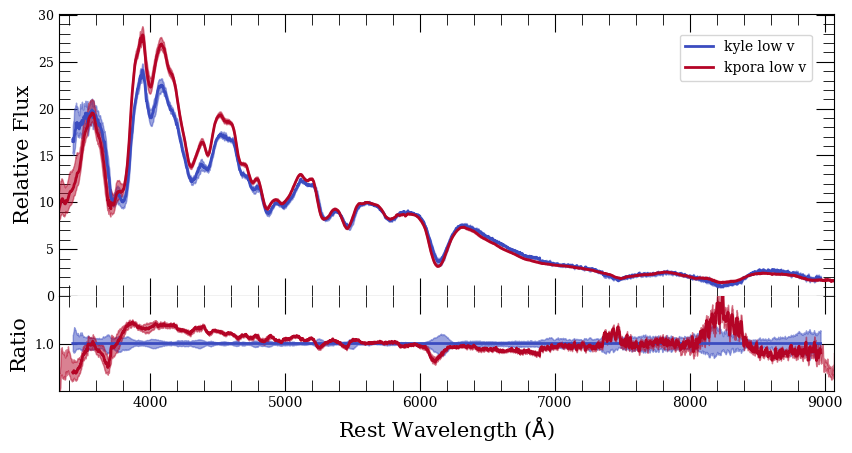

In [41]:
compare_low = [composites_found[0], composites_kpora[0]]
kpora.set_min_num_spec(compare_low, 5)
kplot.scaled_plot(compare_low, min_num_show=5, zoom=False, legend_labels = ['kyle low v', 'kpora low v'], scale_region=[5500,5700], savename='../../Foundation/Spectra/kyle_plot_spectra/foundation_kpora_compare_low')


Phase:  -0.4464329985619787
dm15:  0.5430732606808747
Redshift:  0.027665483271523978
Phase:  -0.2605689539332651
dm15:  1.1264313482300954
Redshift:  nan


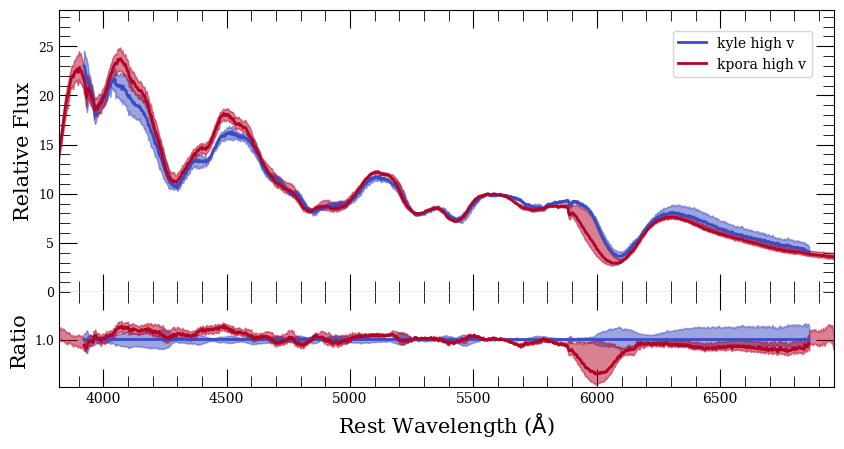

In [42]:
compare_high = [composites_found[1], composites_kpora[1]]
kpora.set_min_num_spec(compare_high, 4)
kplot.scaled_plot(compare_high, min_num_show=4, zoom=False, legend_labels = ['kyle high v', 'kpora high v'], scale_region=[5500,5700], savename='../../Foundation/Spectra/kyle_plot_spectra/foundation_kpora_compare_high')


In [329]:
files_low = ""
for spec in og_sn_arrays_kpora[0]:
    files_low = files_low + "'" + spec.filename +"'" + ','
for spec in og_sn_arrays_found[0]:
    files_low = files_low + "'" + spec.filename +"'" + ','
print files_low
print 
files_high = ""
for spec in og_sn_arrays_kpora[1]:
    files_high = files_high + "'" + spec.filename +"'" + ','
for spec in og_sn_arrays_found[1]:
    files_high = files_high + "'" + spec.filename +"'" + ','
print files_high

'1996X_19960416_3748_9916_00.dat','1996X_19960417_4654_6623_00.dat','1996X_19960417_4654_6623_01.dat','1996X_19960418_3079_10670_00.dat','1996X_19960419_3077_10669_00.dat','sn1996X-19960416.44-fast.flm','sn1996X-19960417.33-fast.flm','sn1996X-19960418.31-fast.flm','sn1996X-19960419.30-fast.flm','sn2005w-20050211.200-br.flm','SN07af_070314_b01_DUP_BC.dat','SN07af_070314_r01_DUP_BC.dat','sn2007af-20070313.45-fast.flm','sn2007af-20070313.545-ui-corrected.flm','sn2007af-20070314.44-fast.flm','sn2007af-20070315.39-fast.flm','sn1996ab-19960522.37-fast.flm','sn2007o-20070122.663-deimos.flm','2002er_20020907_6200_10097_00.dat','2002er_20020908_3737_9384_00.dat','2002er_20020910_3209_9997_00.dat','sn1998aq-19980427.29-fast.flm','sn1998aq-19980428.26-fast.flm','sn1998aq-19980429.26-fast.flm','SN04ey_041025_b01_CLA_LD.dat','SN08hv_081215_b01_CLA_LD.dat','SN08hv_081218_b01_CLA_LD.dat','SN08hv_081218_b02_CLA_LD.dat','SN05ag_050212_b01_DUP_WF.dat','sn2005ag-20050212.596-br.flm','2005cf_20050611_3331

In [330]:
combined_queries = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where filename in ('1996X_19960416_3748_9916_00.dat','1996X_19960417_4654_6623_00.dat','1996X_19960417_4654_6623_01.dat','1996X_19960418_3079_10670_00.dat','1996X_19960419_3077_10669_00.dat','sn1996X-19960416.44-fast.flm','sn1996X-19960417.33-fast.flm','sn1996X-19960418.31-fast.flm','sn1996X-19960419.30-fast.flm','sn2005w-20050211.200-br.flm','SN07af_070314_b01_DUP_BC.dat','SN07af_070314_r01_DUP_BC.dat','sn2007af-20070313.45-fast.flm','sn2007af-20070313.545-ui-corrected.flm','sn2007af-20070314.44-fast.flm','sn2007af-20070315.39-fast.flm','sn1996ab-19960522.37-fast.flm','sn2007o-20070122.663-deimos.flm','2002er_20020907_6200_10097_00.dat','2002er_20020908_3737_9384_00.dat','2002er_20020910_3209_9997_00.dat','sn1998aq-19980427.29-fast.flm','sn1998aq-19980428.26-fast.flm','sn1998aq-19980429.26-fast.flm','SN04ey_041025_b01_CLA_LD.dat','SN08hv_081215_b01_CLA_LD.dat','SN08hv_081218_b01_CLA_LD.dat','SN08hv_081218_b02_CLA_LD.dat','SN05ag_050212_b01_DUP_WF.dat','sn2005ag-20050212.596-br.flm','2005cf_20050611_3331_9999_00.dat','2005cf_20050612_3201_9285_00.dat','sn2005cf-20050610.34-fast.flm','sn2005cf-20050611.205-ui.flm','sn2005cf-20050611.32-fast.flm','sn2005cf-20050611.6-uvot-clip.flm','sn2005cf-20050611.6-uvot.flm','sn2005cf-20050612.36-fast.flm','sn2005cf-20050613.29-fast.flm','sn2005cf-20050614.31-fast.flm','sn1999gd-19991205-uvoir.flm','sn1999gd-19991208.52-fast.flm','sn2002fk-20020929.44-fast.flm','sn2005el-20051004.534-ui-corrected.flm','sn2001da-20010714.46-fast.flm','sn2001da-20010715.47-mmt.flm','SN05hc_051024_b01_MGH_BC.dat','sn2003cq-20030408-ui.flm','sn2003cq-20030409.25-fast.flm','sn2003cq-20030410.22-fast.flm','sn2003cq-20030411.25-fast.flm','sn2002cr-20020515.28-fast.flm','sn2002ck-20020502.46-fast.flm','sn2002ck-20020503.34-fast.flm','SN05bo_050418_b01_DUP_WF.dat','SN05bo_050419_b01_DUP_WF.dat','sn2005bo-20050418.21-fast.flm','SN08bq_080407_b01_DUP_WF.dat','SN08bf_080328_b01_NTT_EM.dat','SN08bf_080328_g01_NTT_EM.dat','SN08bf_080331_b01_DUP_WF.dat','sn2008bf-20080330.31-fast.flm','sn2011fe-20110909-snifs.dat','sn2011fe-20110910-snifs.dat','sn2011fe-20110911-snifs.dat','sn2011fe-20110912-snifs.dat','sn2011fe-visit5-hst.flm','sn1997dt-19971204.11-fast.flm','SN06os_061122_b01_DUP_WF.dat','SN06ax_060331_b01_DUP_WF.dat','SN06ax_060402_b01_DUP_WF.dat','sn2006ax-20060402.30-fast.flm','sn2006az-20060331.37-fast.flm','SN05kc_051124_b01_DUP_MS.dat','SN05kc_051125_b01_DUP_MS.dat','sn2006sr-20061222.12-fast.flm','sn2006sr-20061224.09-fast.flm','sn2004bg-20040411.39-fast.flm','sn2007co-20070612.35-fast.flm','sn2007co-20070613.39-fast.flm','sn2007co-20070614.38-fast.flm','sn2007co-20070614.468-ui-corrected.flm','sn2007co-20070615.36-fast.flm','sn2006cf-20060519.25-fast.flm','sn1998eg-19981024.15-fast.flm','sn2005ms-20060106.400-ui.flm','sn1998bu-19980518.16-fast.flm','sn1998bu-19980520.15-fast.flm','sn1999ac-19990312-ui-corrected.flm','sn1999ac-19990312.53-fast.flm','2003du_20030505_3499_7775_00.dat','2003du_20030506_3446_7775_00.dat','2003du_20030507_3404_10096_00.dat','2003du_20030508_5858_7062_00.dat','sn2003du-20030505.30-fast.flm','sn2003du-20030508.30-fast.flm','sn2002ha-20021102-ui-corrected.flm','sn2002ha-20021104.11-mmt.flm','kyle_foundation_asassn15il_phase=-2.27076872997.txt','kyle_foundation_asassn15nr_phase=4.77672098892.txt','kyle_foundation_asassn15pn_phase=3.4191859734.txt','kyle_foundation_asassn15pr_phase=1.02189720097.txt','kyle_foundation_ps15ahs_phase=4.16222428833.txt','kyle_foundation_ps15aii_phase=0.0791535553055.txt','kyle_foundation_ps15bwh_phase=-0.0180355475521.txt','kyle_foundation_ps16cqa_phase=1.60302915219.txt','kyle_foundation_ps16fbb_phase=-2.4871096383.txt','kyle_foundation_ps16fbb_phase=3.21360295077.txt','kyle_foundation_2016gmg_phase=-2.06099989421.txt','kyle_foundation_2016gsu_phase=-2.009279776.txt','kyle_foundation_2016hhv_phase=2.99542840765.txt','kyle_foundation_2017cfc_phase=0.459371638989.txt','kyle_foundation_2017cii_phase=0.509012817511.txt','kyle_foundation_2017ciy_phase=-0.550489121496.txt','kyle_foundation_2017cjv_phase=-1.86137658412.txt','kyle_foundation_asassn16ct_phase=-2.80293140419.txt','kyle_foundation_asassn16dw_phase=-0.479844779937.txt','kyle_foundation_asassn17eb_phase=0.0742016556139.txt','kyle_foundation_atlas17ajn_phase=1.93178900097.txt','kyle_foundation_ps16dnp_phase=3.03058498496.txt','kyle_foundation_ps16evk_phase=1.21389134103.txt','kyle_foundation_ps16fa_phase=-2.24784143568.txt')",
                    "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where filename in ('sn2003kc-20031203.49-fast.flm','sn2002kf-20021231.34-fast.flm','SN07as_070319_b01_DUP_BC.dat','sn2006ej-20060824.430-ui.flm','SN07jg_070922_b01_CLA_LD.dat','sn2003W-20030209.35-fast.flm','sn2003W-20030210.35-fast.flm','sn2003ch-20030325.16-fast.flm','sn2003ch-20030327.13-fast.flm','sn2003ch-20030328.14-fast.flm','2002bo_20020322_3200_8974_00.dat','2002bo_20020323_3356_10385_00.dat','sn2002bo-20020322-ui-corrected.flm','sn2002bo-20020322.17-fast.flm','SN05ku_051125_b01_DUP_MS.dat','sn2007bz-20070426.419-ui.flm','sn1997bp-19970409.29-fast.flm','sn1997bp-19970410.27-fast.flm','sn1997bp-19970411.30-fast.flm','sn1998dk-19980831-ui.flm','sn1998dh-19980804.36-fast.flm','sn1998ef-19981029.31-fast.flm','sn2005na-20060104.34-fast.flm','sn2005na-20060105.335-ui.flm','sn2005na-20060106.361-ui-corrected.flm','kyle_foundation_2017oz_phase=-3.82531764956.txt','kyle_foundation_2017po_phase=-0.345116699194.txt','kyle_foundation_asassn15go_phase=-0.300830730375.txt','kyle_foundation_asassn15od_phase=-1.58367556708.txt','kyle_foundation_asassn15uw_phase=-1.94283563048.txt','kyle_foundation_asassn16fs_phase=4.38281493353.txt','kyle_foundation_ps16bnz_phase=-3.2910765016.txt','kyle_foundation_2016glp_phase=-3.45854332022.txt','kyle_foundation_asassn15go_phase=0.680597699448.txt')"]
composites_combined, sn_arrays_combined, boot_sn_arrays_combined = kpora.make_composite(combined_queries, boot=True, medmean=1, verbose=True, av_corr=True, shape_param='dm15',
                                                                         gini_balance=True, combine=True, get_og_arr=False, make_corr=True,
                                                                         db_file='../data/kaepora_v1.1_wkyledata.db')


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where filename in ('1996X_19960416_3748_9916_00.dat','1996X_19960417_4654_6623_00.dat','1996X_19960417_4654_6623_01.dat','1996X_19960418_3079_10670_00.dat','1996X_19960419_3077_10669_00.dat','sn1996X-19960416.44-fast.flm','sn1996X-19960417.33-fast.flm','sn1996X-19960418.31-fast.flm','sn1996X-19960419.30-fast.flm','sn2005w-20050211.200-br.flm','SN07af_070314_b01_DUP_BC.dat','SN07af_070314_r01_DUP_BC.dat','sn2007af-20070313.45-fast.flm','sn2007af-20070313.545-ui-corrected.flm','sn2007af-20070314.44-fast.flm','sn2007af-20070315.39-fast.flm','sn1996ab-19960522.37-fast.flm','sn2007o-20070122.663-deimos.flm','2002er_20020907_6200_10097_00.dat','2002er_20020908_3737_9384_00.dat','2002er_20020910_3209_9997_00.dat','sn1998aq-19980427.29-fast.flm','sn1998aq-19980428.26-fast.flm','sn1998aq-19980429.26-fast.flm','SN04ey_041025_b01_CLA_LD.dat','SN08hv_081215_b01_CLA_LD.dat','SN08hv_081218_b01_CLA_LD.dat','SN08hv_081218_b02

Gini balancing...
Balanced after 23 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where filename in ('sn2003kc-20031203.49-fast.flm','sn2002kf-20021231.34-fast.flm','SN07as_070319_b01_DUP_BC.dat','sn2006ej-20060824.430-ui.flm','SN07jg_070922_b01_CLA_LD.dat','sn2003W-20030209.35-fast.flm','sn2003W-20030210.35-fast.flm','sn2003ch-20030325.16-fast.flm','sn2003ch-20030327.13-fast.flm','sn2003ch-20030328.14-fast.flm','2002bo_20020322_3200_8974_00.dat','2002bo_20020323_3356_10385_00.dat','sn2002bo-20020322-ui-corrected.flm','sn2002bo-20020322.17-fast.flm','SN05ku_051125_b01_DUP_MS.dat','sn2007bz-20070426.419-ui.flm','sn1997bp-19970409.29-fast.flm','sn1997bp-19970410.27-fast.flm','sn1997bp-19970411.30-fast.flm','sn1998dk-19980831-ui.flm','sn1998dh-19980804.36-fast.flm','sn1998ef-19981029.31-fast.flm','sn2005na-20060104.34-fast.flm','sn2005na-20060105.335-ui.flm','sn2005na-20060106.361-ui

nan
Phase:  0.17574304715459516
dm15:  1.1276719761982872
Redshift:  nan
HR:  1.0942795455982004
nan
Phase:  -0.27800997498931435
dm15:  nan
Redshift:  nan
HR:  1.039796643747236


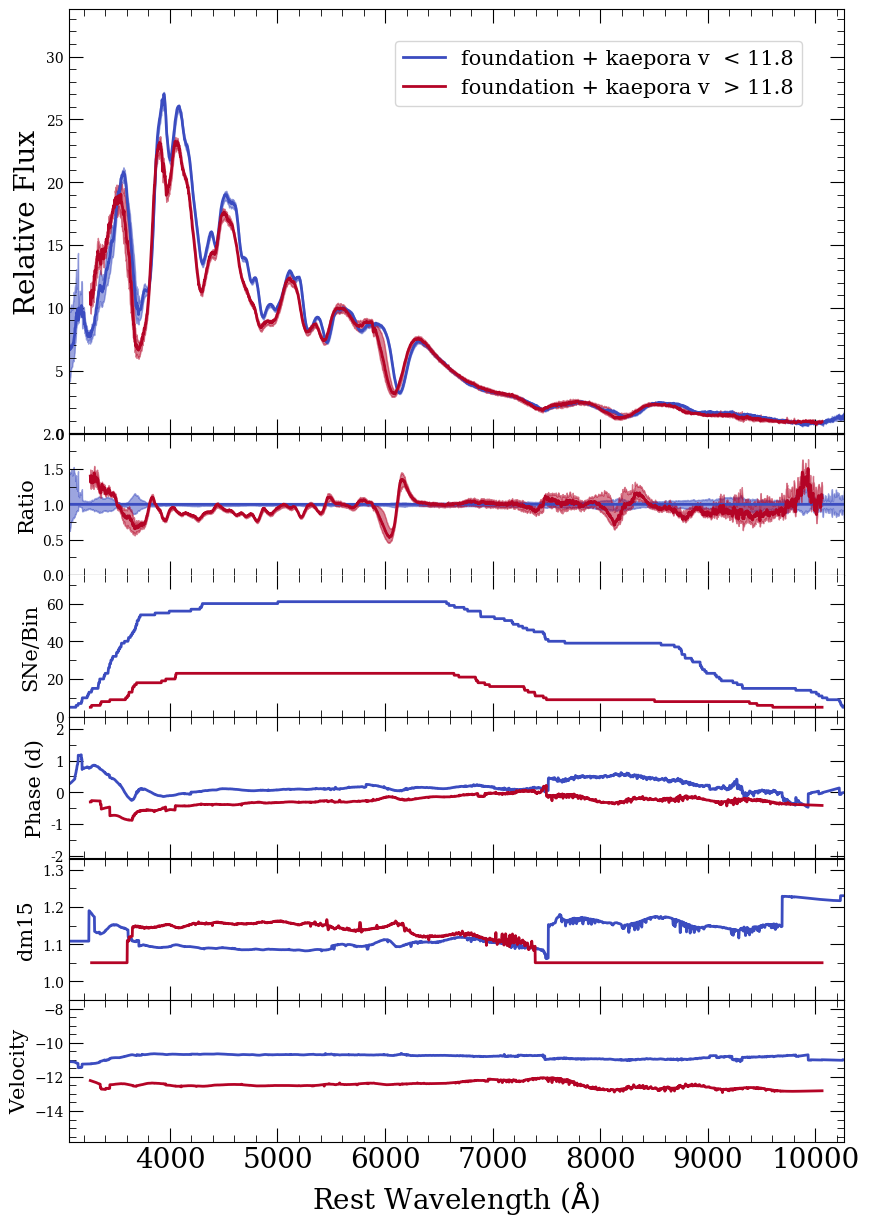

In [331]:
kpora.set_min_num_spec(composites_combined, 5)
kplot.comparison_plot(composites_combined, scale_type=False, min_num_show=5, extra=True, scale_region=[5500,5700], legend_labels = ['foundation + kaepora v  < 11.8', 'foundation + kaepora v  > 11.8'], savename='../../Foundation/Spectra/kyle_plot_spectra/foundation+kpora_vsplit_v2')


In [332]:
# kpora.save_comps_to_files([composites_combined[0]], 'foundation+kaepora_vlow', scale_region=[5500,5700], folder = '../../Foundation/Spectra/kyle_plot_spectra/')
kpora.save_comps_to_files([composites_combined[1]], 'foundation+kaepora_vhigh_v2', scale_region=[5500,5700], folder = '../../Foundation/Spectra/kyle_plot_spectra/')


-0.28 nan nan
../../Foundation/Spectra/kyle_plot_spectra/foundation+kaepora_vhigh_v2_N=23_Nspec=34_phase=m0.28_x1=nan.txt


In [27]:
for sn in sn_arrays_velx1[0]:
    print sn.name, sn.event_data['kyle_c']
print 
for sn in sn_arrays_kpora[0]:
    print sn.name, sn.event_data['c']

asassn15pr -0.0486024383993
ps15ahs -0.0694715002171
ps15bzz -0.0174971755386
ps17bii -0.0912114914205
1996x -0.0345203632011
1997dt 0.486125772047
1998eg 0.0219800791948
1999gd 0.391038793425
2001da 0.0829048526957
2002cr -0.0280048150178
2002fk -0.105803909244
2004eo 0.00617360973981
2004ey -0.14158983541
2005bo 0.220294790475
2005cf -0.0262761554518
2005el -0.152094064067
2005ki -0.0876012355411
2005na -0.0910035661888
2005w 0.114826426833
2006ax -0.105515183146
2006az -0.102099924041
2006hx 0.0356226250233
2007af -0.0246253813739
2007bc -0.0110932826679
2007bm 0.378102016354
2008c 0.114042038984

2003cq_combined 0.0740097
2005ag_combined None
2005cf_combined None
2003it_combined 0.0485026
1996x_combined None
2002er_combined None
2008bf_combined -0.0198939
2006d_combined None
2001ep_combined None
2007af_combined None
2011fe_combined None
2004ef_combined 0.0836825
2003du_combined None
1999ac_combined None
1999cc_combined -0.00626487
2007co_combined 0.0842432
1996ab None
1994d None
19

1996x 0.0395526 0.0395526


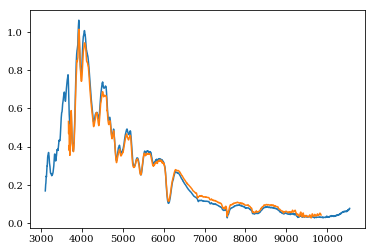

1998eg 0.2009 0.2009


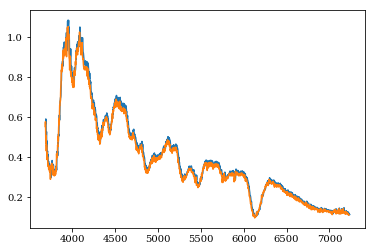

1999gd 1.1341 1.1341


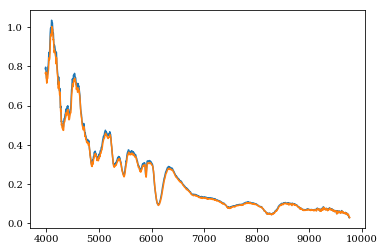

2002fk 0.00304357 0.00304357


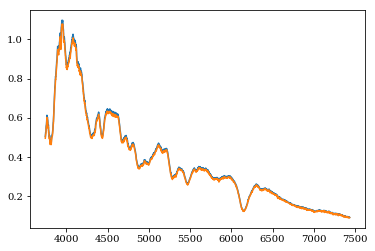

2004ey 0.00294312 0.00294312


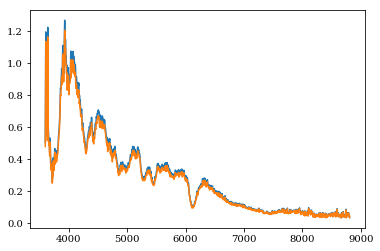

2005cf 0.2019 0.2019


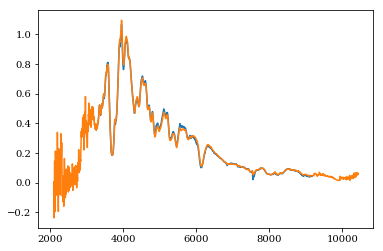

2006ax 0.0631411 0.0631411


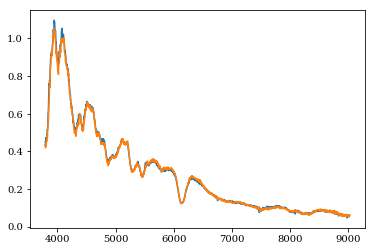

2006az 0.00294448 0.00294448


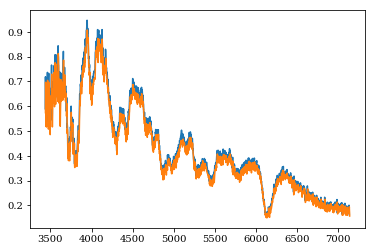

2007af 0.4089 0.4089


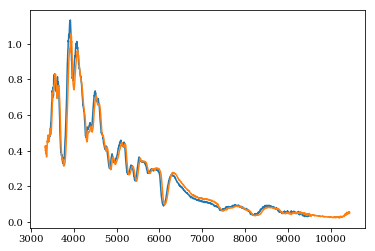

2007bc 0.2494 0.2494


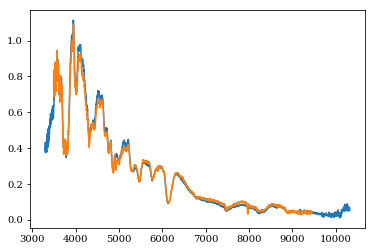

10


In [28]:
count = 0
for sn1 in sn_arrays_velx1[0]:
    for sn2 in sn_arrays_kpora[0]:
        if sn1.name == sn2.name or sn1.name == sn2.name.split('_')[0]:
            count = count + 1
            print sn1.name, sn1.event_data['Av_25'], sn2.event_data['Av_25']
            plt.plot(sn1.wavelength[sn1.x1:sn1.x2], sn1.flux[sn1.x1:sn1.x2])
            plt.plot(sn2.wavelength[sn2.x1:sn2.x2], sn2.flux[sn2.x1:sn2.x2])
            plt.show()
print count

1998dh 0.2015 0.2015
1998dh 0.3894 0.3894


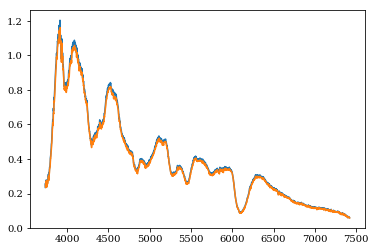

2002bo 0.0775 0.0775
2002bo 1.1992 1.1992


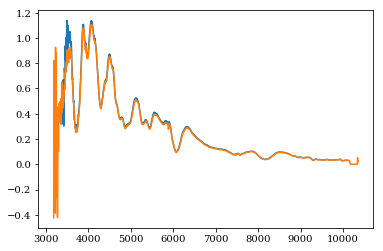

2007as 0.434 0.434
2007as 0.00155138 0.00155138


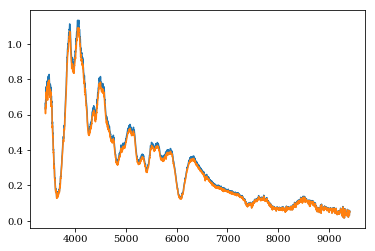

2007bd 0.1023 0.1023
2007bd 0.00295066 0.00295066


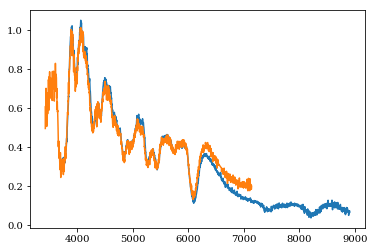

2007jg 0.3224 0.3224
2007jg 0.1737 0.1737


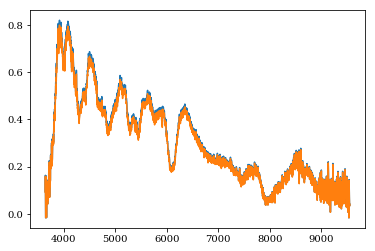

5


In [29]:
count = 0
for sn1 in sn_arrays_velx1[1]:
    for sn2 in sn_arrays_kpora[1]:
        if sn1.name == sn2.name or sn1.name == sn2.name.split('_')[0]:
            count = count + 1
            print sn1.name, sn1.event_data['Av_MW'], sn2.event_data['Av_MW']
            print sn1.name, sn1.event_data['Av_25'], sn2.event_data['Av_25']
            plt.plot(sn1.wavelength[sn1.x1:sn1.x2], sn1.flux[sn1.x1:sn1.x2])
            plt.plot(sn2.wavelength[sn2.x1:sn2.x2], sn2.flux[sn2.x1:sn2.x2])
            plt.show()
print count

In [193]:
kpora_ryan = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -2 and -2"]
composites_ryan, sn_arrays_ryan, og_sn_arr_ryan, boot_sn_arrays_ryan = kpora.make_composite(kpora_ryan, boot=True, medmean=1, verbose=True, av_corr=True, shape_param='dm15',
                                                                         gini_balance=True, combine=True, get_og_arr=True, make_corr=True,
                                                                         db_file='../data/kaepora_v1.1.db')

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -2 and -2
1 Total Spectra found
0 flagged spectra removed 1 spectra left
0 spectra of peculiar Ias removed 1 spectra left
0 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
0 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
Using 0 spectra of 0 SNe
No spectra found


In [197]:
kpora_queries = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -2 and 2"]

composites_kpora, sn_arrays_kpora, og_sn_arrs_kpora, boot_sn_arrays_kpora = kpora.make_composite(kpora_queries, boot=False, medmean=1, verbose=True, av_corr=True, shape_param='dm15',
                                                                         gini_balance=True, combine=True, get_og_arr=True, make_corr=True,
                                                                         db_file='../data/kaepora_v1.1.db')

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase between -2 and 2
439 Total Spectra found
19 flagged spectra removed 420 spectra left
10 spectra of peculiar Ias removed 410 spectra left
304 spectra of SNe that have host reddening corrections
Arrays cleaned
304 spectra may have telluric contamination
138 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
1994d_combined None other 311.4623943985268 0.9933967714441324 1.3700000000000003 3462.0 9184.0
2004ef_combined None csp 78.83546109677305 -0.39032289871995524 1.3900000000000003 3374.0 8956.0
2004as_combined None cfa 85.77997321897303 0.4373038106955397 0.92 3612.0 7312.0
1994t_combined None cfa 11.24257350467516 0.2579263791305037 1.5100000000000005 3678.0 7468.0
1994s_combined None bsnip 57.770984472156314 0.9910531415945931 0.9399999999999998 3076.0 11130.0
1998dx_combined None cfa 35.891477478862015 -0.27038661180785317 1.3200000000000005 3532.0 

Gini balancing...
Balanced after 30 iterations


nan
Phase:  0.17423351531602807
dm15:  1.169615808534001
Redshift:  nan
HR:  1.7082762615234868


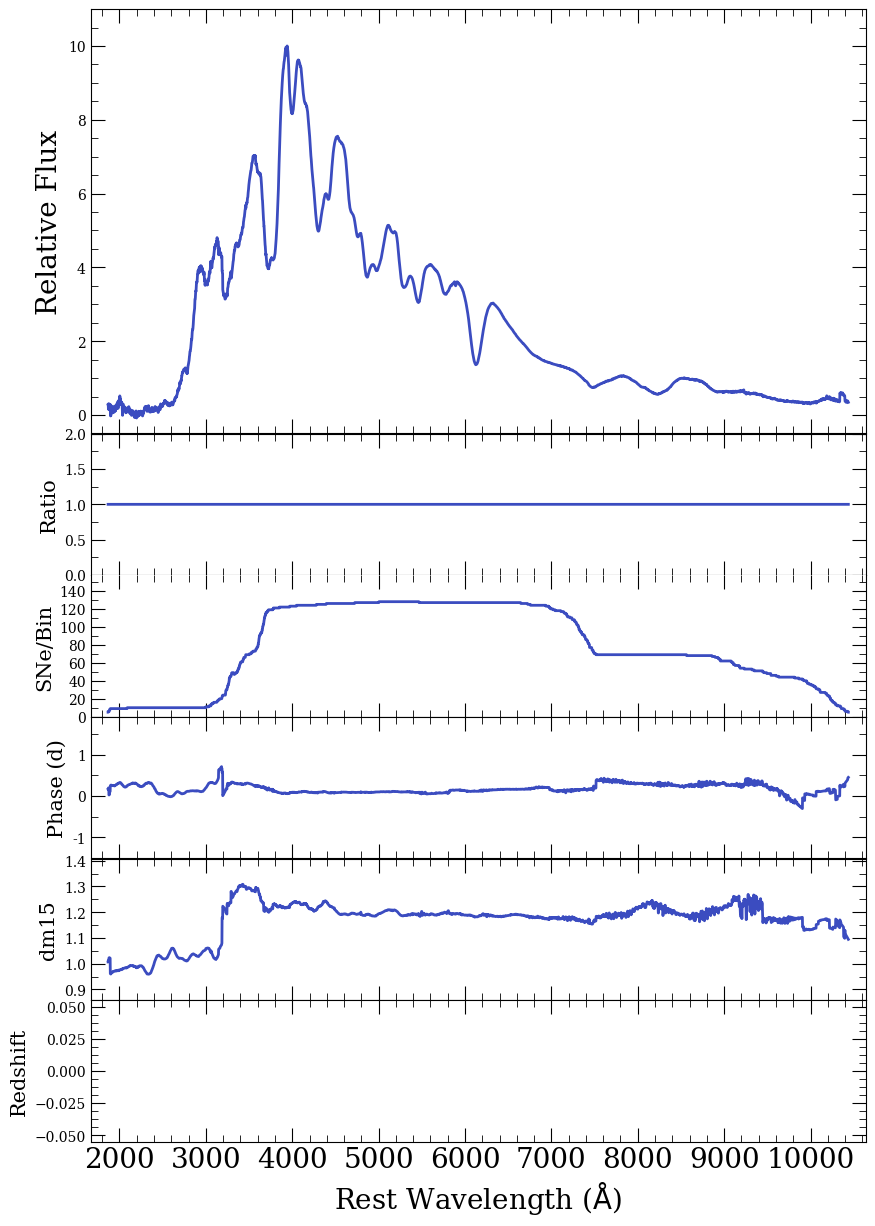

In [199]:
kpora.set_min_num_spec(composites_kpora, 5)
kplot.comparison_plot(composites_kpora, scale_type=False, min_num_show=5, extra=False)

In [221]:
w1 = 3999.9
w2 = 7000.1
inds = np.where((og_sn_arrs_kpora[0][0].wavelength > w1) & (og_sn_arrs_kpora[0][0].wavelength < w2))
all_data = []
new_og_arr = []
for i, sn in enumerate(og_sn_arrs_kpora[0]):
    if sn.wavelength[sn.x1] <= w1 and sn.wavelength[sn.x2] >= w2:
#         print i, sn.name, sn.filename
#         plt.figure(figsize=[15,8])
#         plt.plot(sn.wavelength[inds], sn.flux[inds])
#         plt.show()
        all_data.append(sn.flux[inds])
        new_og_arr.append(sn)
    else:
        print sn.filename, 'doesnt pass cut'

sn1999gh-19991205-uvoir.flm doesnt pass cut
sn2005lz-20060101.381-deimos.flm doesnt pass cut
sn2005w-20050211.200-br.flm doesnt pass cut
sn2007n-20070122.583-deimos.flm doesnt pass cut
sn2007o-20070122.663-deimos.flm doesnt pass cut
sn1994ae-19941129.51-fast.flm doesnt pass cut
sn1994ae-19941130.49-fast.flm doesnt pass cut
sn1996ab-19960522.37-fast.flm doesnt pass cut
sn1998bu-19980520.15-fast.flm doesnt pass cut
sn1999by-19990513.18-fast.flm doesnt pass cut
sn2006cj-20060523.33-fast.flm doesnt pass cut
sn2006oa-20061125.08-fast.flm doesnt pass cut
sn2006oa-20061127.10-fast.flm doesnt pass cut
sn2006ot-20061124.23-fast.flm doesnt pass cut
sn2006ot-20061127.30-fast.flm doesnt pass cut
SN05hc_051024_b01_MGH_BC.dat doesnt pass cut
SN05ku_051125_b01_DUP_MS.dat doesnt pass cut
SN06is_061001_b01_BAA_IM.dat doesnt pass cut
SN06kf_061103_b01_NTT_EM.dat doesnt pass cut
SN06kf_061103_r01_NTT_EM.dat doesnt pass cut
SN07af_070314_r01_DUP_BC.dat doesnt pass cut
SN08bf_080328_b01_NTT_EM.dat doesnt p

In [217]:
np.savetxt('../../kaepora_ryan.csv', all_data, delimiter=',')

In [220]:
print og_sn_arrs_kpora[0][0].wavelength[inds]

[4000. 4002. 4004. ... 6996. 6998. 7000.]


In [245]:
# ryan_inds = [104,13,80,100,132,92,48,5,193,162,84,133,204,74,213,83,153,49,219,194,50,151,118,218,161,121,138,36,79,70,99,214,73,14,228,20,78,215,186,12,44,23,97,188,152,47,68,4,87,190,217,229,86,103,139,156,130,102,136,69,208,134,210,11,141,72,207,167,165,46,187,96,202,180,45,230,135,71,35,216,88,166,26,140,185,27,184,189,37,90,33,95,3,25,116,183,43,38,91,59,181,178,243,94,54,52,42,179,117,101,18,244,182,111,7,53,40,93,170,227,235,113,64,177,61,211,226,171,236,241,89,2,172,144,66,77,10,110,16,137,225,209,203,150,120,9,205,98,109,114,34,163,32,17,119,76,234,200,149,63,62,164,112,176,30,157,169,107,148,233,21,75,6,199,31,168,147,232,122,220,51,67,146,192,123,28,65,82,191,224,124,237,221,125,242,240,238,128,115,145,126,39,239,222,129,22,131,127,158,24,159,15,81,155,108,231,201,41,142,160,8,105,85,212,143,19,55,173,56,223,106,57,58,29,197,196,206,174,175,195,198,154,1,0,60]
# phase = []
# dm15 = []
# vel = []
# for ind in ryan_inds:
#     phase.append(new_og_arr[ind].phase)
#     dm15.append(new_og_arr[ind].dm15)
#     vel.append(new_og_arr[ind].event_data['si_v0'])

ryan_inds = [104,13,80,100,132,92,48,5,193,162,84,133,204,74,213,83,153,49,219,194,50,151,118,218,161,121,138,36,79,70,99,214,73,14,228,20,78,215,186,12,44,23,97,188,152,47,68,4,87,190,217,229,86,103,139,156,130,102,136,69,208,134,210,11,141,72,207,167,165,46,187,96,202,180,45,230,135,71,35,216,88,166,26,140,185,27,184,189,37,90,33,95,3,25,116,183,43,38,91,59,181,178,243,94,54,52,42,179,117,101,18,244,182,111,7,53,40,93,170,227,235,113,64,177,61,211,226,171,236,241,89,2,172,144,66,77,10,110,16,137,225,209,203,150,120,9,205,98,109,114,34,163,32,17,119,76,234,200,149,63,62,164,112,176,30,157,169,107,148,233,21,75,6,199,31,168,147,232,122,220,51,67,146,192,123,28,65,82,191,224,124,237,221,125,242,240,238,128,115,145,126,39,239,222,129,22,131,127,158,24,159,15,81,155,108,231,201,41,142,160,8,105,85,212,143,19,55,173,56,223,106,57,58,29,197,196,206,174,175,195,198,154,1,0,60]
new_inds =  [48,146,133,26,34,43,39,106,217,93,54,64,107,88,30,22,101,51,73,61,58,83,89,108,76,95,100,98,112,244,36,135,97,94,25,72,124,56,232,227,92,110,138,134,231,125,164,163,153,228,71,121,149,219,218,155,123,215,187,224,226,175,162,141,91,234,145,166,198,225,223,152,114,178,6,222,103,8,159,206,220,200,212,117,184,193,17,150,160,148,19,20,216,199,197,207,1,75,204,151,183,190,211,132,142,3,33,186,96,147,35,37,180,167,40,174,214,188,213,45,127,172,49,52,161,171,11,179,118,189,209,70,173,69,157,9,4,24,185,0,12,53,27,79,10,165,201,74,119,122,21,16,15,203,14,28,68,67,2,31,32,126,42,195,194,81,87,44,5,63,86,46,38,140,192,29,7,202,84,80,55,41,99,181,205,23,13,59,196,47,82,66,18,65,191,105,210,57,109,62,137,85,77,90,102,115,111,113,130,116,104,136,60,131,177,78,169,144,128,156,143,120,129,158,139,168,170,50,154,176,182,208,221,237,239,238,235,236,240,241,242,243,230,233,229]
phase = []
dm15 = []
vel = []
sns = []
for ind in ryan_inds:
    sns.append(new_og_arr[ind])
    phase.append(new_og_arr[ind].phase)
    dm15.append(new_og_arr[ind].dm15)
    vel.append(new_og_arr[ind].event_data['si_v0'])
    
phase_new = []
dm15_new = []
vel_new = []
for ind in new_inds:
    phase_new.append(sns[ind].phase)
    dm15_new.append(sns[ind].dm15)
    vel_new.append(sns[ind].event_data['si_v0'])

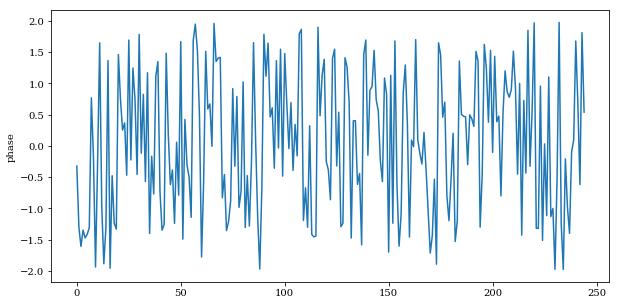

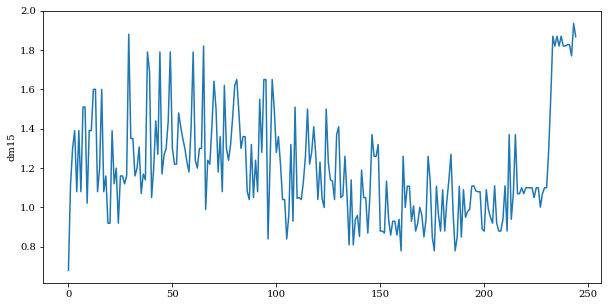

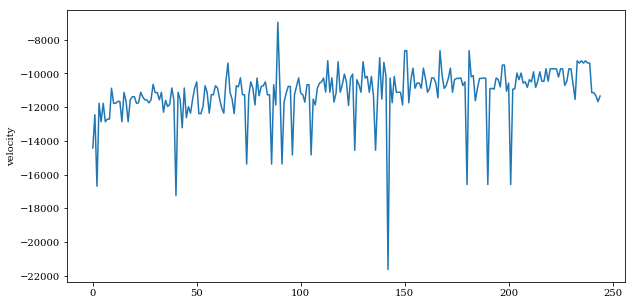

In [246]:
# plt.figure(figsize = [10,5])
# plt.plot(phase)
# plt.ylabel('phase')
# plt.show()
# plt.figure(figsize = [10,5])
# plt.plot(dm15)
# plt.ylabel('dm15')
# plt.show()
# plt.figure(figsize = [10,5])
# plt.plot(vel)
# plt.ylabel('velocity')
# plt.show()
plt.figure(figsize = [10,5])
plt.plot(phase_new)
plt.ylabel('phase')
plt.show()
plt.figure(figsize = [10,5])
plt.plot(dm15_new)
plt.ylabel('dm15')
plt.show()
plt.figure(figsize = [10,5])
plt.plot(vel_new)
plt.ylabel('velocity')
plt.show()